**Milestone 1 Phase 1**
Rahmad Gunawan
FTDS-Batch 013

![Say Haii](https://img.freepik.com/free-vector/people-holding-credit-cards-illustration_53876-6375.jpg?w=1060&t=st=1658854015~exp=1658854615~hmac=314383ce39642c97338025b23c523c28e53b67c7388653453c9cefedb314dedb?fit=fill&w=500&h=500))

Sumber gambar : [freepik.com](https://img.freepik.com/free-vector/people-holding-credit-cards-illustration_53876-6375.jpg?w=1060&t=st=1658854015~exp=1658854615~hmac=314383ce39642c97338025b23c523c28e53b67c7388653453c9cefedb314dedb)


# **I.Perkenalan**

Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 1 dalam konsep Supervised Learning.

**Deskripsi :** 
Dataset yang digunakan pada project ini adalah dataset yang berisi informasi tentang pembayaran default, data kredit, riwayat pembayaran, dan laporan tagihan klien kartu kredit di Taiwan dari April 2005 hingga September 2005, Default payment adalah suatu keadaan dimana konsumen yang pengajuan kreditnya sudah disetujui lantas mengalami keterlambatan. kondisi tersebut tentunya sangat merugikan bagi perusahaan yang mengeluarkan kartu kredit tersebut, oleh karena itu kita diminta untuk membuat model untuk memprediksi nasabah mana saja yang dapat memiliki potensi gagal bayar [default payment] [yes,no], yaitu dengan mengetahui informasi pada dataset tersebut.

**Objektif :**
Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:
1. Mampu memperoleh data menggunakan BigQuery
2. Mampu memahami konsep supervised learning
3. Mampu mempersiapkan data untuk digunakan dalam model supervised learning
4. Mampu mengimplementasikan supervised learning dengan data yang diberikan
5. Mampu melakukan evaluasi model
6. Mampu melakukan model tuning

# **II. Import Libraries**

**Library yang digunakan adalah Numpy,Pandas,Sklearn,Scipy,Plotly,Seaborn**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from scipy import stats
import plotly.express as px
from feature_engine.outliers import Winsorizer

# Sklearn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearnex import patch_sklearn #untuk mempercepat model
patch_sklearn()
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from xgboost import XGBClassifier # Extreme Gradient Boosting
import warnings
warnings.filterwarnings("ignore") 

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
c:\Users\rahma\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# **III. Data Loading**

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll

### **A. Data Retrieve**
Dalam tahapan ini akan dimulai dengan mengambil **dataset *Credit Card Default*.** bersumber dari  **bigquery-public-data,Google Cloud Platform** dengan melakukan **query** berdasarkan persyaratan tertentu yaitu ***limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month***

Link untuk menuju ke dataset [Credit Card Default](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table)


Script dibawah digunakan untuk menquery data yang dibutuhkan untuk mengolah dataset *Census Adult Income*, berdasarkan ketentuan diatas

SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month

FROM `bigquery-public-data.ml_datasets.credit_card_default`

LIMIT 25961 # Batch 13 * 1997 (tahun Lahir)

### **B. Menyimpan Data**

Data yang sudah diakses kemudian disimpan dengan nama file **'h8dsft_P1M1_Rahmad-Gunawan.csv'** Untuk untuk kemudian data tersebut diload

### **C. *Data Loading***

In [2]:
data = pd.read_csv("h8dsft_P1M1_Rahmad-Gunawan.csv")
pd.set_option("display.max.columns",None) # digunakan untuk menampilkan keseluruhan kolom pada dataset
pd.set_option('display.max_row', 10)
data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


**Menampilkan Head dan Tail**

In [3]:
data.head() #menampilkan 5 data teratas

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [4]:
data.tail()  #menampilkan 5 data terbawah

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,-2,379.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
data.isna().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
                             ..
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
Length: 24, dtype: int64

### **D. *Data Characteristic***

Tahapan ini merupakan salah satu **Tahapan Penting**, mengapa penting ? dikarenakan, jika kita tidak mengetetahui apa saja isi dari dataset yang kita loading, dan informasi dasar apa yang dapat kita ketahui, nantinya kita akan bingung untuk mengolah/menganalisa datanya, oleh karena itu kita perlu berkenalan dahulu dengan dataset tersebut. Tahapan ini juga digunakan untuk mengetahui gambaran secara umum tentang dataset, dimana kita dapat mengetahui jumlah row pada dataset, dan jumlah kolom.

In [6]:
data.shape

(2965, 24)

In [7]:
data.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

In [8]:
data.info() # Hanya untuk memberikan informasi jenis tipe data dan terdapat kolom apa saja pada dataset tersebut

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [9]:
data.duplicated().sum() # mengecek apakah terdapat duplikasi pada dataset yang diload

1

In [10]:
data[data.duplicated()] # menapilkan data yang terdapat duplikasi

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2245,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


terdapat satu duplikat pada dataframe tersebut, sehingga kita perlu menghapus data duplikat tersebut

**Drop Tabel Duplicate**

In [11]:
data = data.drop_duplicates(keep='first') # menghapus data duplikat

In [12]:
data.duplicated().sum() # memastikan tidak terdapat data duplikat

0

In [13]:
data.describe() # melihat gambaran singkat terkait dataset

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2.964000e+03,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000
mean,163356.950067,1.607625,1.849865,1.560054,35.193657,0.004723,-0.121795,-0.141026,-0.184548,-0.224696,-0.254049,52135.889001,50666.241228,48256.032726,44104.558367,40969.898448,39786.491228,6351.044872,6.274611e+03,5152.234818,4562.914980,4914.944332,5384.517544,0.214238
std,125049.701016,0.488362,0.778159,0.522304,9.110949,1.114434,1.180479,1.183337,1.178049,1.158739,1.167061,72334.536115,70790.828470,68151.445516,61912.600106,58276.878626,57308.498646,20888.933729,2.888432e+04,14289.177313,13283.476236,16736.920951,17278.585006,0.410362
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3979.750000,3403.500000,3311.750000,2585.000000,1974.500000,1433.000000,1013.000000,9.975000e+02,479.250000,313.750000,325.250000,175.250000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24325.000000,23169.000000,21549.500000,19895.000000,18819.500000,18511.500000,2238.000000,2.182500e+03,1997.000000,1600.000000,1646.500000,1626.500000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69863.000000,67836.250000,63034.500000,58638.500000,53414.500000,52297.000000,5089.500000,5.000000e+03,4500.000000,4000.250000,4021.000000,4081.750000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


***Insight* Data Awal**

Dari Informasi dasar ini dapat diketahui dataframe ini terdiri dari 24 kolom yang terdiri atas:
- 6 kolom dengan tipe integer
- 18 kolom dengan tipe float

Dapat diketahui juga terdapat e **tidak terdapat missing value** pada dataset tersebut, pada dataset ini terdapat kolom jenis kelamin, status pendidikan, status pernikahan hingga umur, yang berisikan informasi terkait pengguna kartu kredit, selain itu juga terdapat informasi terkait pembayaran tagihan sebelumnya dan saldo batas kredit yang berisikan batas saldo yang dapat digunakan pada kartu kredit tersebut.

# **IV. *Exploratory Data Analysis (EDA)***

Tahapan ini dilakukan untuk mengenal lebih dalam terkait masing-masing *feature* serta untuk melihat fungsi,tujuan ataupun maksud dari setiap kolom serta untuk menggambarkan apakah dari *feature*/kolom tersebut memeiliki keterhubungan. sehingga kita dapat mengetahui *feature* apa saja yang memiliki korelasi terhadap *feature* target yang kemudian akan diseleksi/*feature* selection. Kita akan mencari korelasi antar masing-masing *feature* terhadap target, dimana targetnya adalah kolom *default_payment_next_month*

**Melihat tipe data/pengelompokan masing masing kolom**

In [14]:
# Mengidentifikasi kolom kategori dan kolom numerikal pada data
num_columns = data.select_dtypes(include=np.number).columns.tolist() # mengelompokan kolom bertipe numerik
cat_columns = data.select_dtypes(include=['object']).columns.tolist() # mengelompokan kolom bertipe kategorik

print('Numerical Columns   : ', num_columns)
print(f'\n') # digunakan untuk list kolom numerik dan kolom kategori
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


Categorical Columns :  []


Berdasarkan identifikasi diatas kita mendapatkan bahwa keseluruhan kolom pada data tersebut merupakan sudah berjenis numerikal kolom, walaupun terdapat beberapa kolom yang sebenarnya adalah kolom dengan jenis kategorikal, namun formatnya secara keseluruhan sudah diubah bentuknya menjadi numerik.

Tahapan selanjutnya adalah kita akan menganalisa masing-masing feature yang terdapat pada dataset, dan melihat korelasinya terhadap kolom target, untuk lebih memudahkan proses EDA, kita juga akan mengelompokan beberapa kolom yang memiliki karakteristik yang sejenis, sehingga proses EDA dapat dilakukan secara bersamaan

## ***A. EDA* Kolom Target *(Default Payment Next Month)***

In [15]:
# Melihat persentase besaran data pada kolom target
fig = px.pie(data, 'default_payment_next_month', title='Default Payment Chart distribution').update_traces(hoverinfo='label+value', textinfo='percent+value', textfont_size=14)
fig.show()
# Sumber : Data Visualization by https://plotly.com/python/pie-charts/

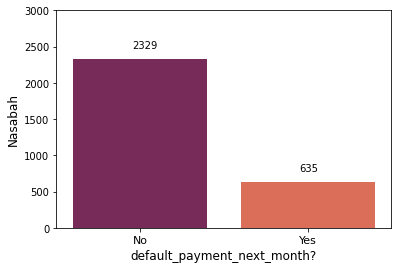

In [16]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="default_payment_next_month", data=data, palette="rocket")
plt.xlabel("default_payment_next_month?", fontsize= 12)
plt.ylabel("Nasabah", fontsize= 12)
plt.ylim(0,3000)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+150))
plt.show()

Informasi diatas menggambarkan bahwa , data yang terdapat pada kolom target `imbalanced`, dimana default payment [0] mendominasi dengan persentase 78,6% dan default payment [1] hanya sebesar 21,4%.

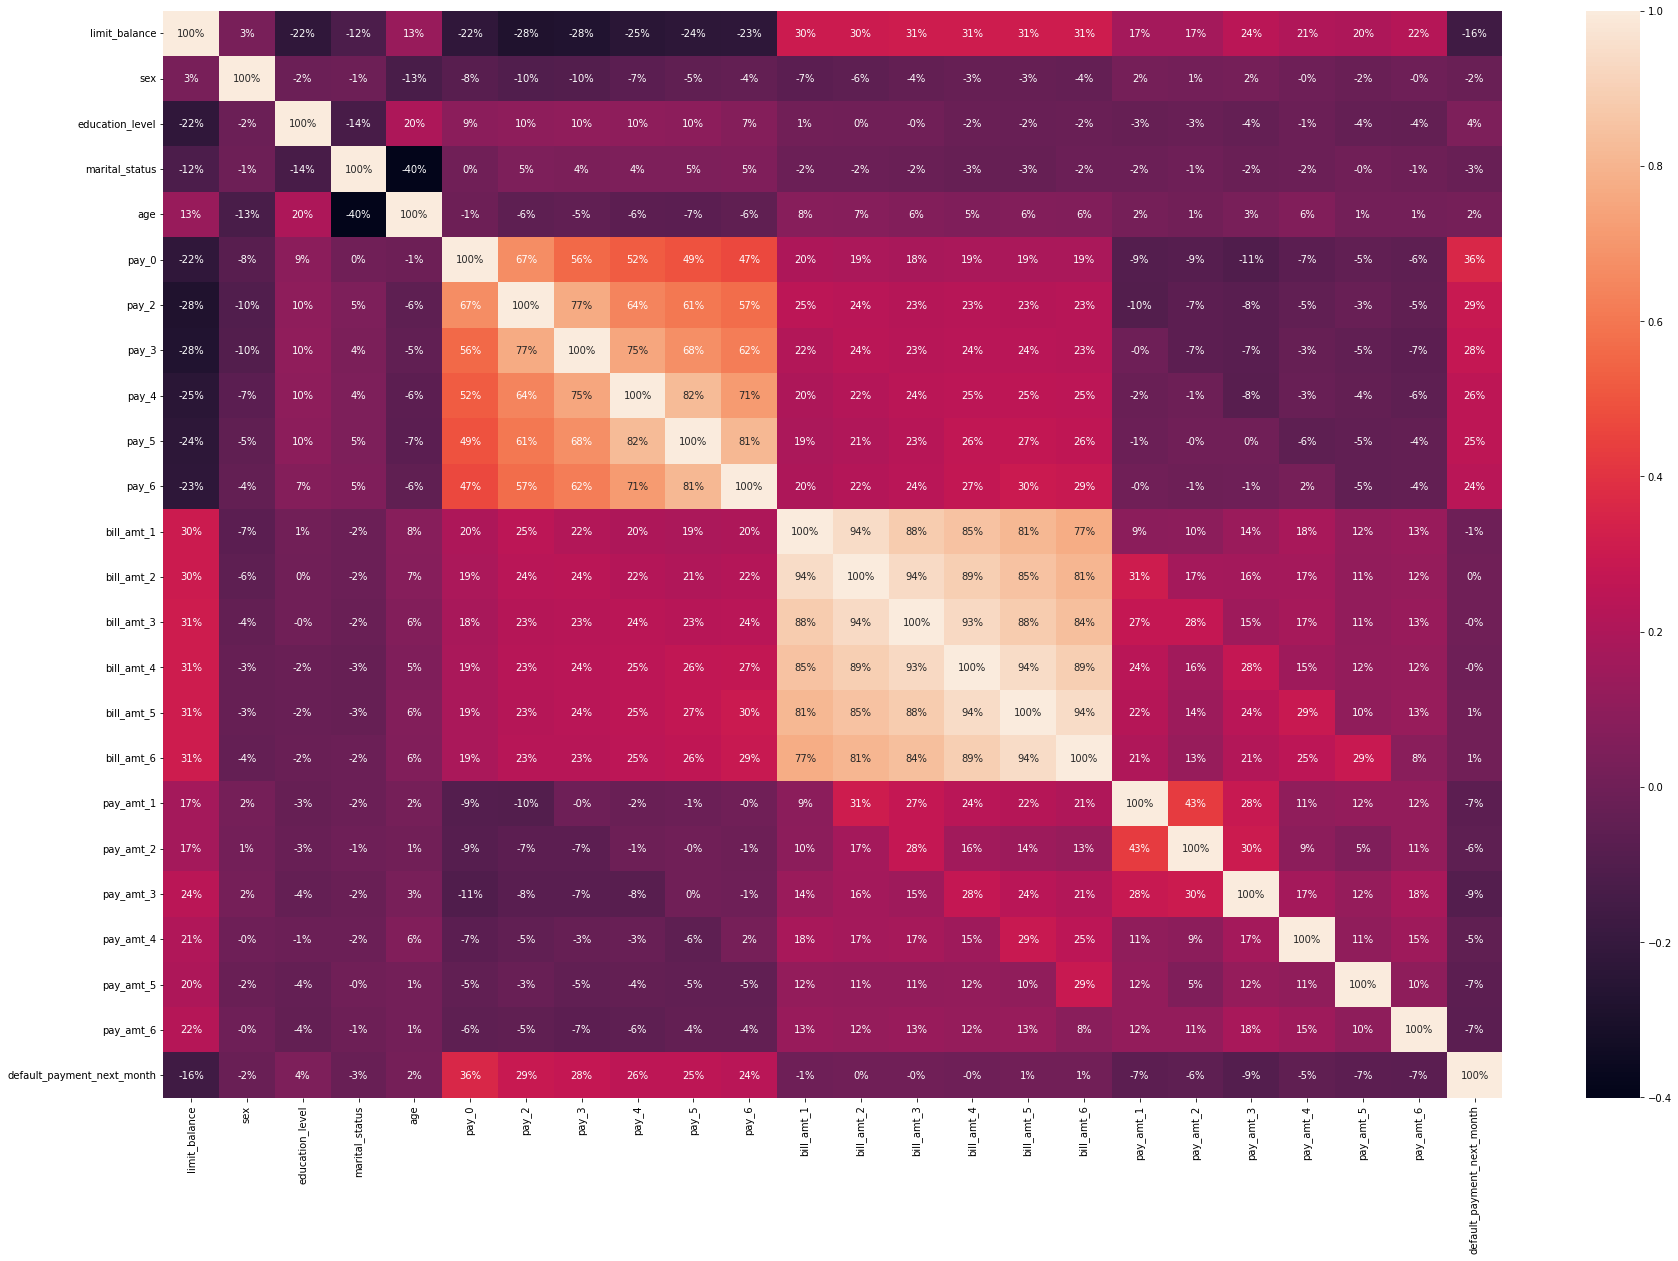

In [17]:
plt.subplots(figsize=(30,20))
sns.heatmap(data.corr(), annot=True, fmt='.0%')
plt.show()

**Berdasarkan Informasi pada heat map diatas, kita juga dapat mengelompokan setiap table yang terdapat dataset pada masing-masing kelompok yang memiliki ciri khas atau kategori yang sama, seperti pada kolom pay yang dapat terdiri atas pay 0 - pay 6, kolom bil, dan kolom payment, sementara sisanya, kita dapat mengeksplore isi dari setiap kolom secara individu/masing-masing, dan mencari keterhubungannya dengan kolom target, apabila tidak terdapat keterhubungan yang kuat maka kita dapat menghapus kolom tersebut**

**Pada Kolom Target *default payment* didapatkan bahwa data tersebut `imbalanced` yang dapat mempengaruhi prediksi pada model, oleh karena itu kita juga perlu memerhatikan *metriks* dalam pemilihan evaluasi model, berdasarkan data diatas didapatkan juga bahwa lebih dari 50% pengguna kredit card tidak diprediksi akan gagal bayar ['default payment'] [0] pada bulan selanjutnya**

## ***B. EDA* Kolom *Feature* *(Limit Balanced )***

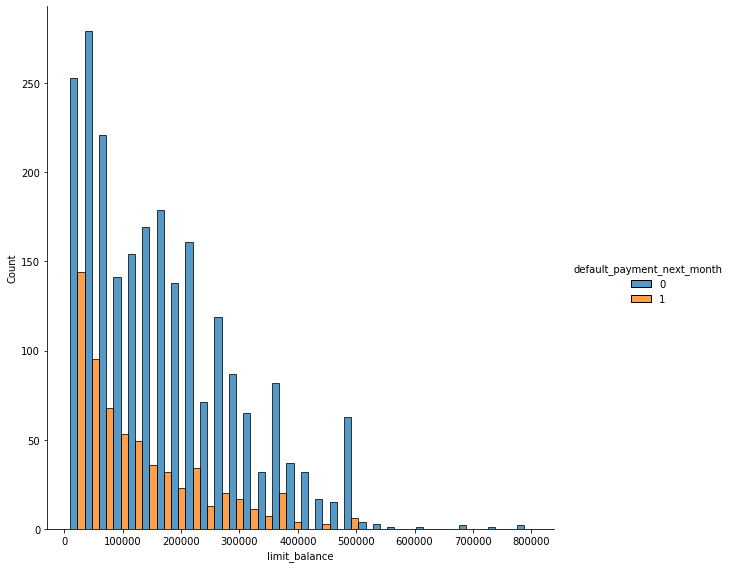

In [18]:
sns.displot(data, x="limit_balance", hue="default_payment_next_month", multiple="dodge",height = 8, aspect = 1) 

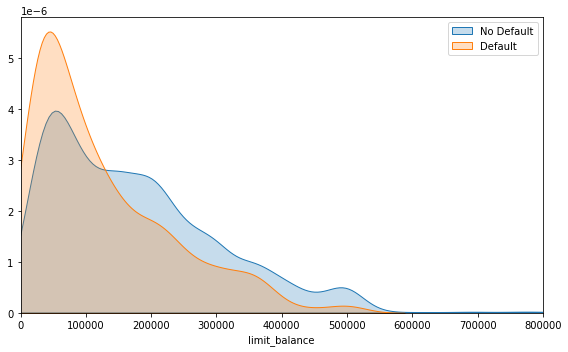

In [19]:
plt.figure(figsize=(8,5)) 
sns.kdeplot(data.loc[(data['default_payment_next_month'] == 0), 'limit_balance'], label = 'No Default', shade = True)
sns.kdeplot(data.loc[(data['default_payment_next_month'] == 1), 'limit_balance'], label = 'Default', shade = True)
plt.xlim(0,800000)
plt.ylabel('')
plt.legend()
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Proportion of population')

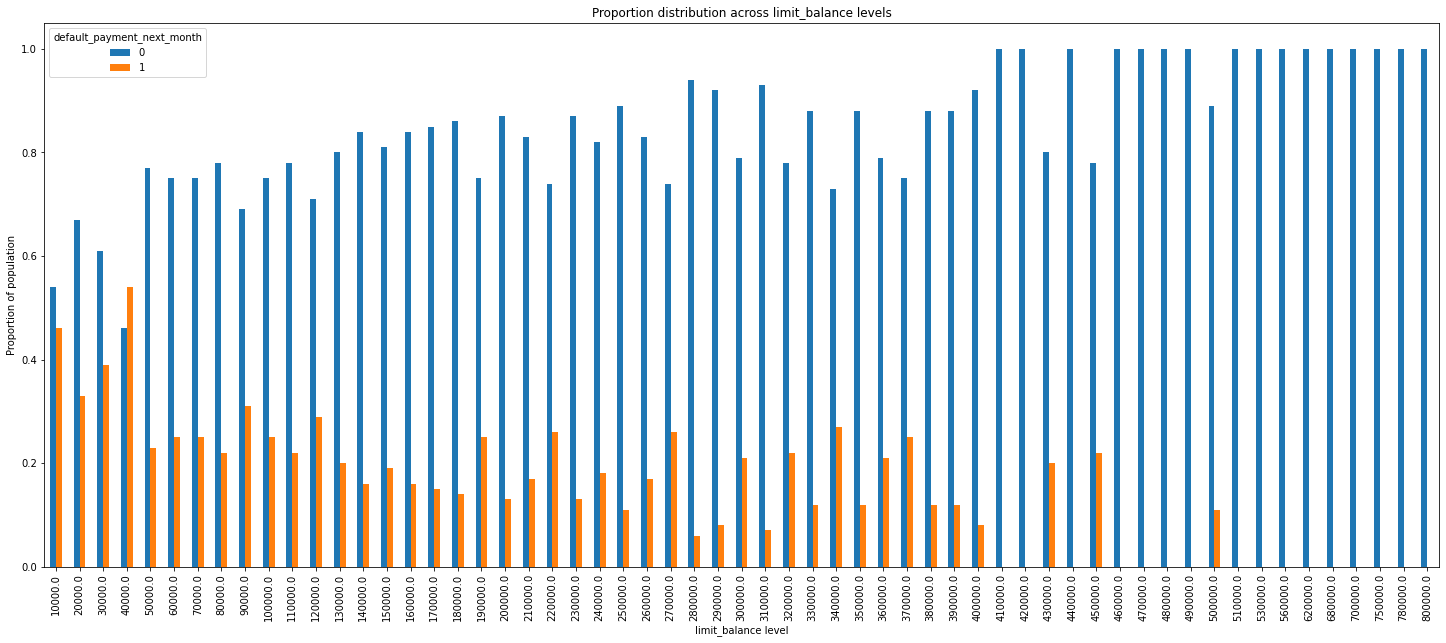

In [20]:
limit_balance = round(pd.crosstab(data.limit_balance, data.default_payment_next_month).div(pd.crosstab(data.limit_balance, data.default_payment_next_month).apply(sum,1),0),2)
limit_balance.sort_values(by='limit_balance', ascending=False)
ax = limit_balance.plot(kind ='bar', title = 'Proportion distribution across limit_balance levels', figsize = (25,10))
ax.set_xlabel('limit_balance level')
ax.set_ylabel('Proportion of population')

<AxesSubplot:>

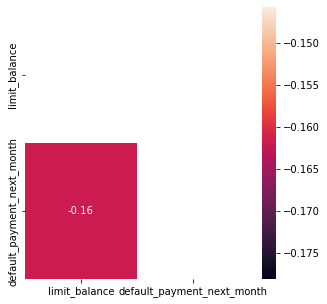

In [21]:
EDA_lmt = ['limit_balance','default_payment_next_month']
EDA_lmt = data[EDA_lmt]
plt.figure(figsize=(5,5))
sb.heatmap(EDA_lmt.corr(),annot=True, mask=np.triu(EDA_lmt.corr()))
# Sumber : Seaborn Heatmap Dokumentasi , https://seaborn.pydata.org/generated/seaborn.heatmap.html

**Berdasarkan informasi diatas, `terdapat korelasi antara *limit balance* dan terhadap *default payment*`, dimana semakin besar limit balanced, proporsi default payment [0/no] semakin besar, semakin kecil limit balance maka default payment [1/yes] atau probabilitas untuk gagal bayar semakin besar (*negative correlation*), hal tersebut juga dibuktikan nilai heat map yang memiliki nilai korelasi -0,16, hal tersebut menunjukan bahwa semakin besar limit kredit yang diberikan maka semakin kecil resiko gagal bayar oleh kreditur, hal tersebut dapat terjadi dikarenakan penentuan limit kredit didasarkan oleh rating atau history pembayaran yang baik yang dilakukan oleh pengguna kartu kredit tersebut ,atau juga dapat didasarkan oleh pendapatan yang tergolong tinggi pada nasabah tersebut**

## **C. *EDA* Kolom *Feature* *(Sex )***

In [22]:
fig = px.pie(data, 'sex', title='Default sex Chart distribution').update_traces(hoverinfo='label+value', textinfo='percent+value', textfont_size=14)
fig.show()
# Sumber : Data Visualization by https://plotly.com/python/pie-charts/

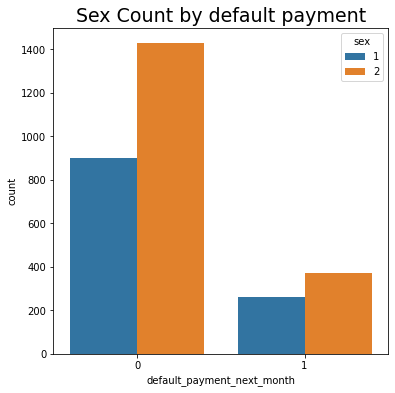

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(data=data, x='default_payment_next_month', hue='sex')
plt.title('Sex Count by default payment', size=19)
plt.show()
# Gender (1=male, 2=female) 

Text(0, 0.5, 'Proportion of population')

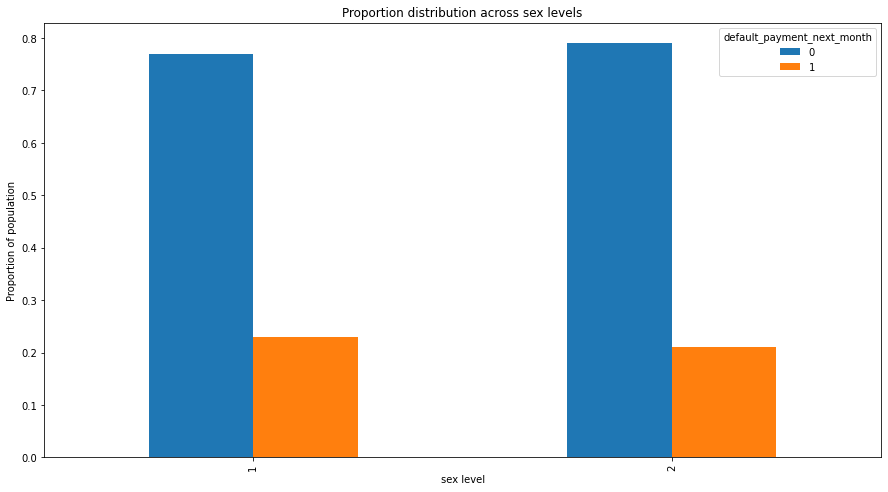

In [24]:
sex = round(pd.crosstab(data.sex, data.default_payment_next_month).div(pd.crosstab(data.sex, data.default_payment_next_month).apply(sum,1),0),2)
sex.sort_values(by =0, inplace = True)
ax = sex.plot(kind ='bar', title = 'Proportion distribution across sex levels',figsize = (15,8))
ax.set_xlabel('sex level')
ax.set_ylabel('Proportion of population')

# Sumber : Data Visualization PO W4D1PM, Hacktiv8

Berdasarkan hasil EDA, **`kolom sex tidak memiliki korelasi yang kuat terhadap kolom target`**, hal tersebut tergambarkan melalui proporsi sex level terhadap default payment, dimana jumlah sex level 2 [female] memang jauh lebih dominan, namun jika dilihat berdasarkan proporsi antara default payment 0 dan 1, keduanya memiliki nilai proporsi yang hampir sama terhadap payment [0] dan [1], yang mengartikan bahwa jenis kelamin tidak mempengaruhi apakah kreditur tersebut memiliki potensi gagal bayar atau tidak, sehingga dapat disimpulkan sex tidak mempengaruhi terkait default payment, hal tersebut juga didukung oleh nilai heat map yang rendah. 

## **D. *EDA* Kolom *Feature* *(Education Level)***

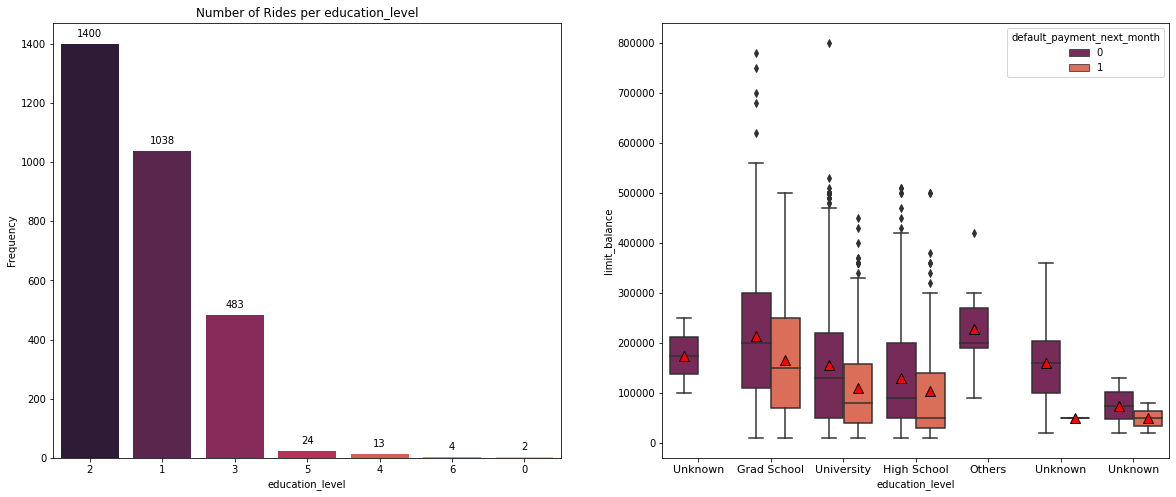

In [25]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
education_level = sns.countplot(x='education_level', palette='rocket', data=data, order=data.education_level.value_counts().index)
for p in education_level.patches:
    education_level.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Number of Rides per education_level')
plt.xlabel('education_level')
plt.ylabel('Frequency')
plt.xticks()
plt.subplot(1, 2, 2)
sns.boxplot(x = "education_level", y = "limit_balance", hue = 'default_payment_next_month', data = data, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4,5,6],['Unknown','Grad School','University','High School','Others','Unknown','Unknown'], fontsize = 11)

plt.show()
# Sumber : Data Visualization PO W4D1PM, Hacktiv8,
        #  Practical Statistics : Descriptive P0 W3D2AM Hacktiv8|

[Text(0, 0, 'Unknown'),
 Text(1, 0, 'Grad School'),
 Text(2, 0, 'University'),
 Text(3, 0, 'High School'),
 Text(4, 0, 'Others'),
 Text(5, 0, 'Unknown'),
 Text(6, 0, 'Unknown')]

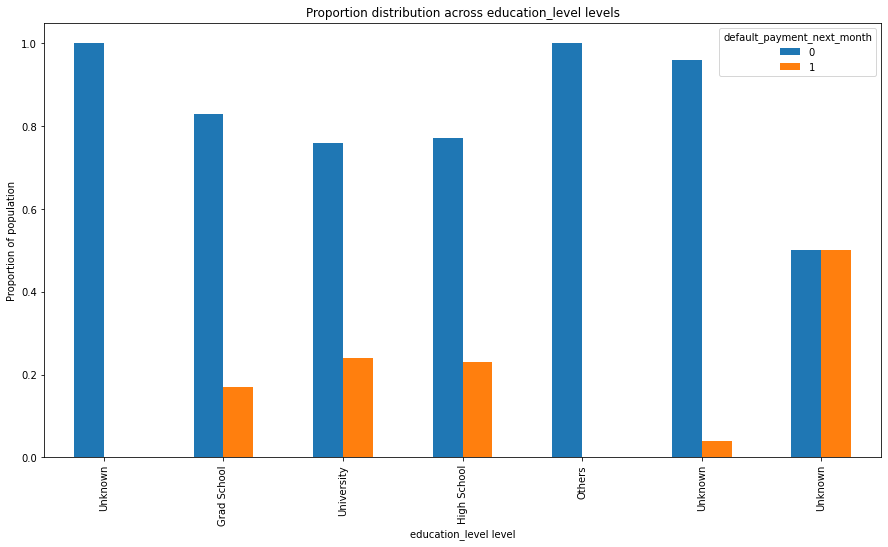

In [26]:
education_level = round(pd.crosstab(data.education_level, data.default_payment_next_month).div(pd.crosstab(data.education_level, data.default_payment_next_month).apply(sum,1),0),2)
education_level.sort_values(by='education_level', ascending = True)
x = ['Unknown','Grad School','University','High School','Others','Unknown','Unknown']
ax = education_level.plot(kind ='bar', title = 'Proportion distribution across education_level levels', figsize = (15,8))
ax.set_xlabel('education_level level')
ax.set_ylabel('Proportion of population')
ax.set_xticklabels(x)
#Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) 

Berdasarkan hasil EDA, didapatkan bahwa **`kolom education tidak memiliki korelasi terhadap kolom target`**, dimana masing masing tingkat pendidikan sangat sedikit mempengaruhi terhadap default payment, serta dengan nilai heatmap yang cukup rendah antara education dan default payment,dan terdapat informasi kolom yang berisikan value Unknown, maka kolom education dapat dihapuskan

## **E. *EDA* Kolom *Feature (Marital Status)***

In [27]:
label_name = ['unknown', 'married', 'single', 'others'] #hanya untuk label, (1=married, 2=single, 3=others) 
px.pie(values=data['marital_status'].value_counts().sort_index(ascending=True),names=label_name, title='% of Marital Status', 
      color_discrete_sequence = px.colors.qualitative.T10)
# Sumber : Data Visualization PO W4D1PM, oleh https://plotly.com/python/pie-charts

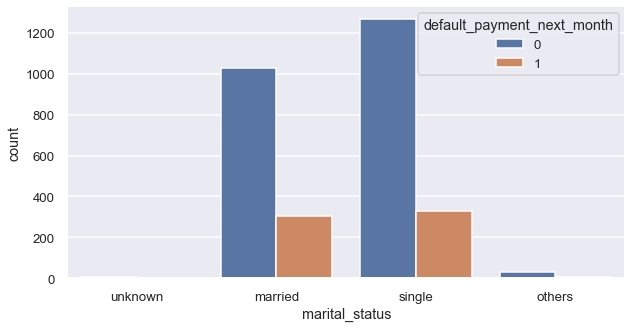

In [28]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_context("talk", font_scale=0.8)
edu = sns.countplot(x='marital_status', hue='default_payment_next_month', data=data)
edu.set_xticklabels(['unknown', 'married', 'single', 'others'])
plt.show()

[Text(0, 0, 'unknown'),
 Text(1, 0, 'married'),
 Text(2, 0, 'single'),
 Text(3, 0, 'others')]

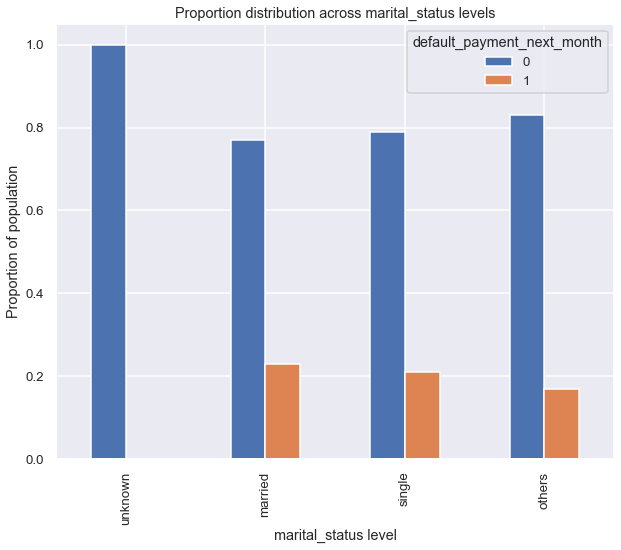

In [29]:
marital_status = round(pd.crosstab(data.marital_status, data.default_payment_next_month).div(pd.crosstab(data.marital_status, data.default_payment_next_month).apply(sum,1),0),2)
marital_status.sort_values(by='marital_status', ascending = True)
x = ['unknown', 'married', 'single', 'others']
ax = marital_status.plot(kind ='bar', title = 'Proportion distribution across marital_status levels', figsize = (10,8))
ax.set_xlabel('marital_status level')
ax.set_ylabel('Proportion of population')
ax.set_xticklabels(x)
#Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) 

Berdasarakan hasil EDA, didapatkan bahwa **`kolom marital_status tidak memiliki korelasi yang cukup kuat terhadap kolom target`** dimana masing masing status pernikahan tidak terlalu mempengaruhi terhadap default payment, hal tersebut juga didukung dengan nilai heatmap nya yang kecil, dimana perbedaan antara status pernikahan terhadap default payment tidak terlalu berbeda, sehingga kolom marital status dapat dihapuskan

## **F. *EDA* Kolom Feature *(Age)***

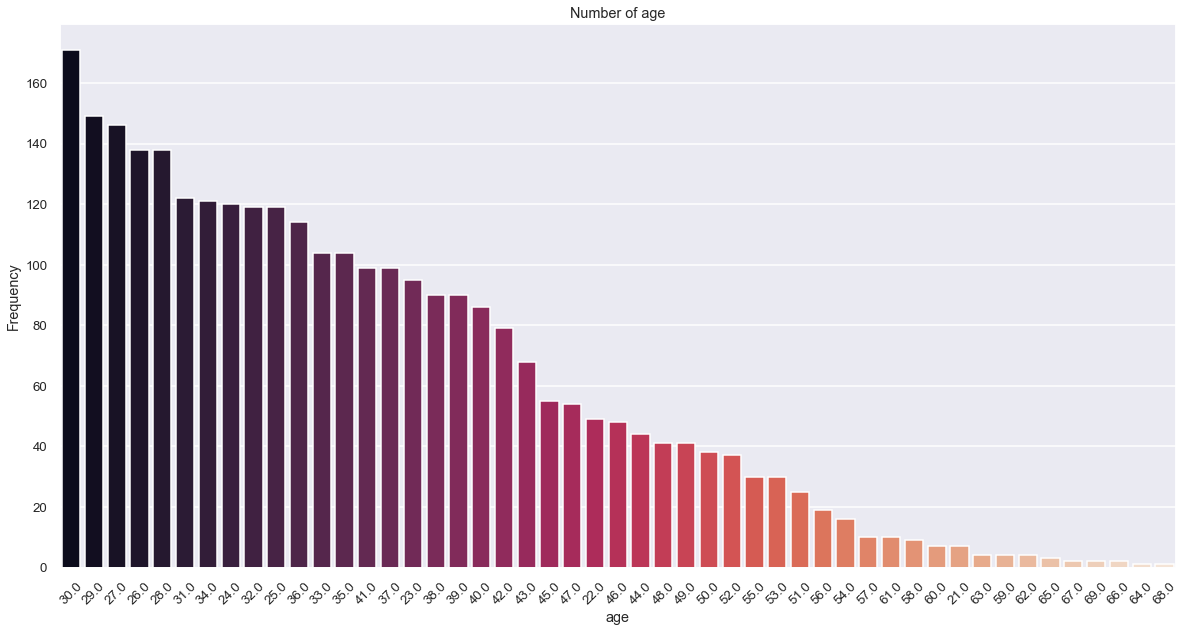

In [30]:
plt.figure(figsize=(20, 10))
age = sns.countplot(x='age', palette='rocket', data=data, order=data.age.value_counts().index)
plt.title('Number of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
# Sumber : Data Visualization PO W4D1PM, Hacktiv8, Color Pallete Dokumentasi Sea Born data visualization

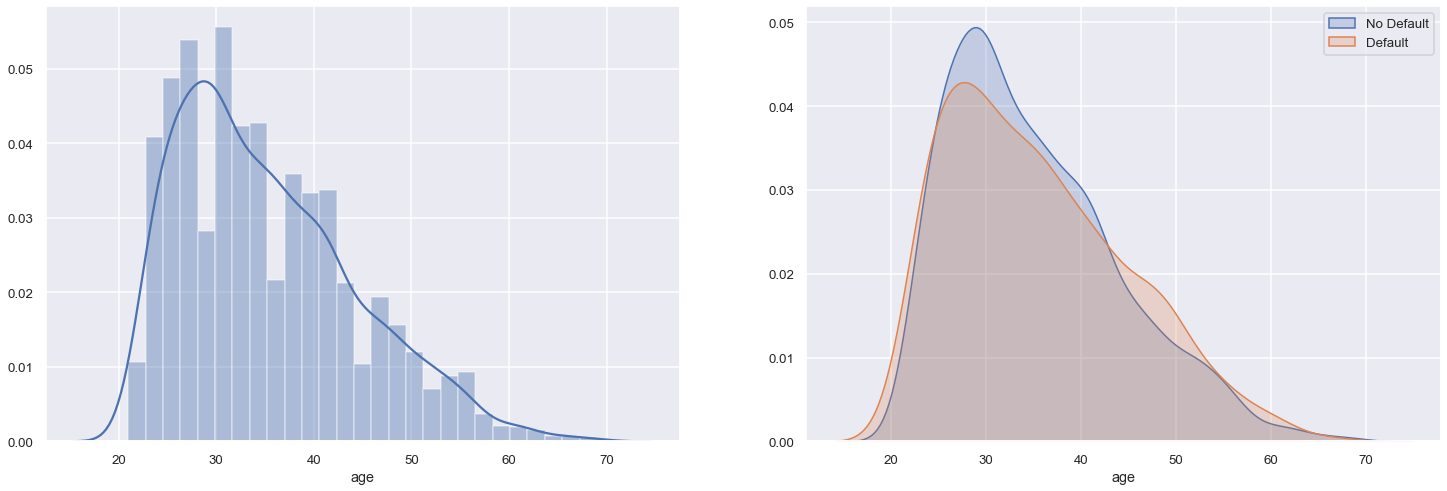

In [31]:
plt.figure(figsize=(25,8))
plt.subplot(1, 2, 1)
sns.distplot(data['age'])
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.subplot(1, 2, 2)
sns.kdeplot(data.loc[(data['default_payment_next_month'] == 0), 'age'], label = 'No Default', shade = True)
sns.kdeplot(data.loc[(data['default_payment_next_month'] == 1), 'age'], label = 'Default', shade = True)
plt.ylabel('')
plt.legend()
plt.show()

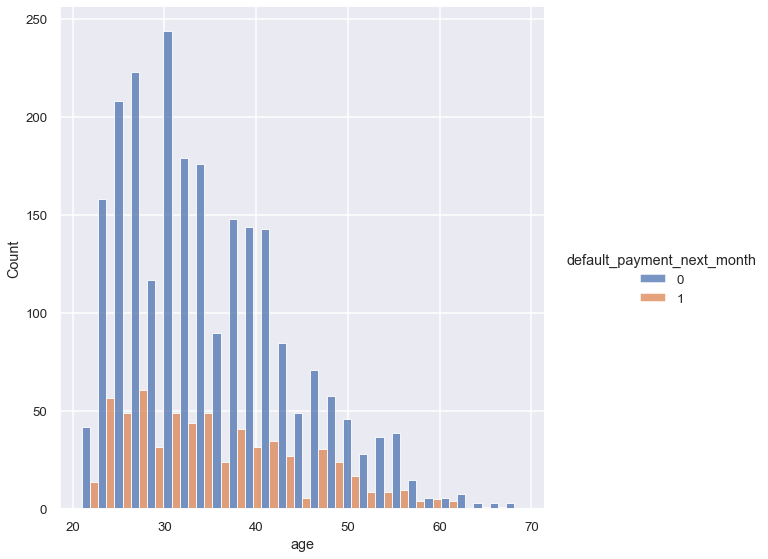

In [32]:
sns.displot(data, x="age", hue="default_payment_next_month", multiple="dodge",height = 8, aspect = 1)

Text(0, 0.5, 'Proportion of population')

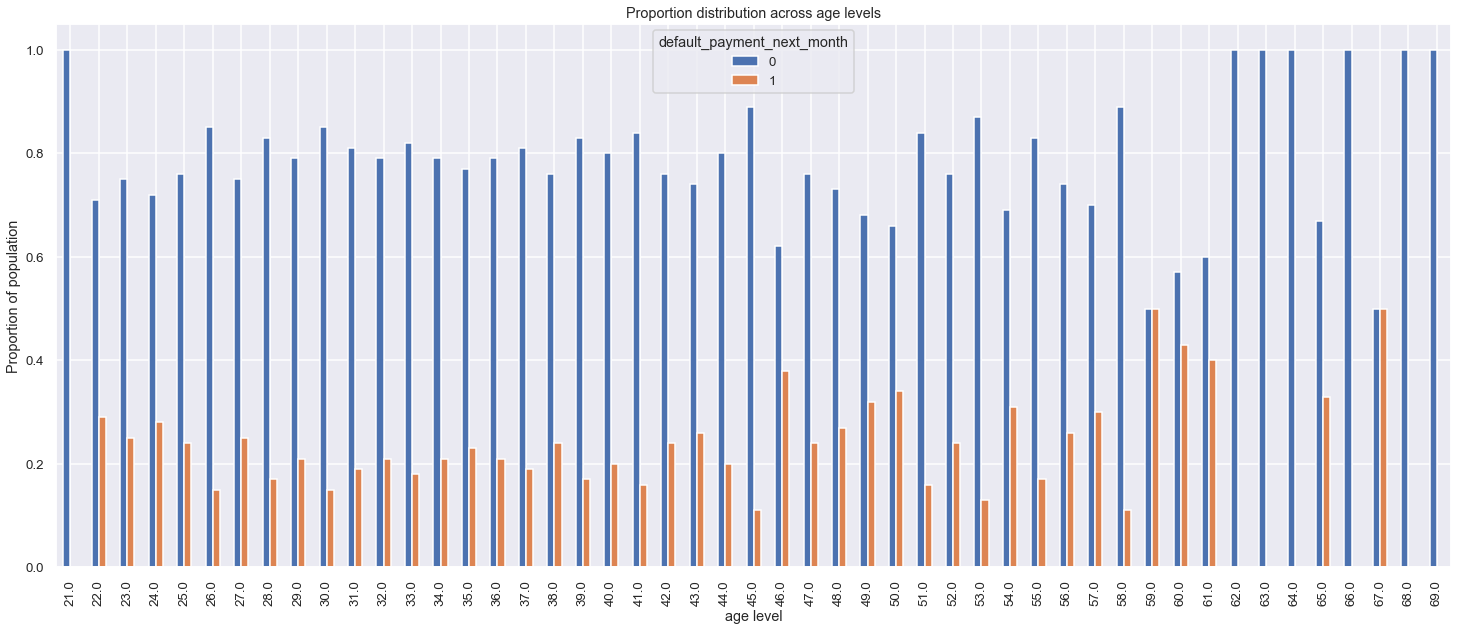

In [33]:
age = round(pd.crosstab(data.age, data.default_payment_next_month).div(pd.crosstab(data.age, data.default_payment_next_month).apply(sum,1),0),2)
age.sort_values(by='age', ascending = True)
ax = age.plot(kind ='bar', title = 'Proportion distribution across age levels', figsize = (25,10))
ax.set_xlabel('age level')
ax.set_ylabel('Proportion of population')

Berdasarkan EDA diatas didapatkan bahwa kebanyakan orang berada dalam kumpulan data dengan rentang usia antara 25 dan 40 tahun. terdapat juga informasi bahwa default payment [1] pada rentang tersebut jauh lebih rendah dibandingkan rentang usia lainnya. yang menunjukan bahwa pada rentang usia tersebut resiko gagal bayar oleh pengguna kredit card cukup tinggi, berdasarkan keseluruhan informasi diatas, dapat disimpulkan bahwa **`kolom age memiliki korelasi terhadap kolom target`**.

## **G. *EDA* Kelompok Kolom Pay *(Pay 0,2,3,4,5,6)***

Pada tahapan ini, EDA dilakukan dengan mengelompokan kolom pay Pay (0,2,3,4,5,6) agar lebih mempermudah dan mempercepat pada tahapan, selain itu, telah terdapat informasi berdasarkan heat map, dimana kolom pay (Pay 0,2,3,4,5,6) memiliki korelasi yang cukup tinggi terhadap kolom target, oleh karena itu pada tahapan EDA ini, hanya merupakan tahapan verifikasi apakah benar kolom pay Pay 0,2,3,4,5,6 memiliki korelasi terhadap kolom target

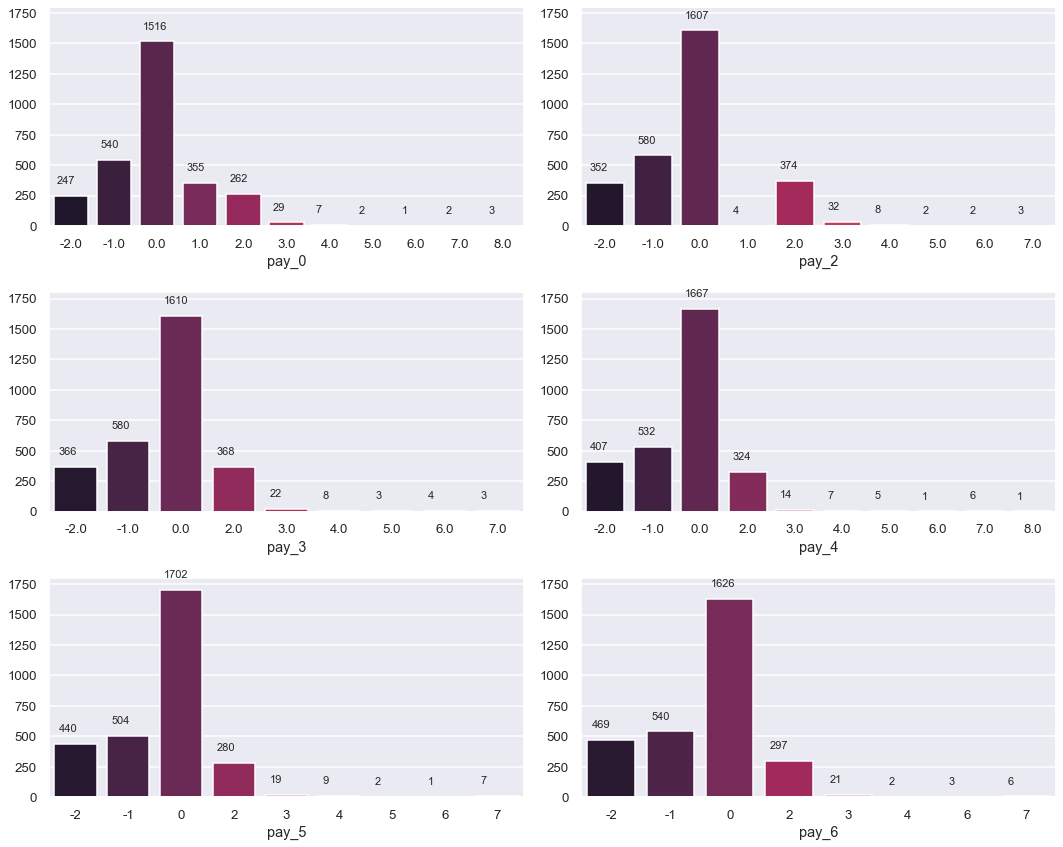

In [34]:
Repayment = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'] # memasukan nama kolom kedalam variabel repayment untuk mempermudah proses looping
plt.figure(figsize=(15,12))
for i,col in enumerate(Repayment):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data.loc[:,col], palette = 'rocket')
    plt.ylim(0,1800)
    plt.ylabel('')
    plt.tight_layout()
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+100), fontsize = 11)
plt.show()

**Melihat Proporsi payment default [1] dan [0] pada setiap kolom pay_1**

Tahapan ini dilakukan untuk melihat apakah value yang terdapat pada setiap kolom pay 0 - 6 memiliki korelasi terhadap kolom target.

Text(0, 0.5, 'Proportion of population')

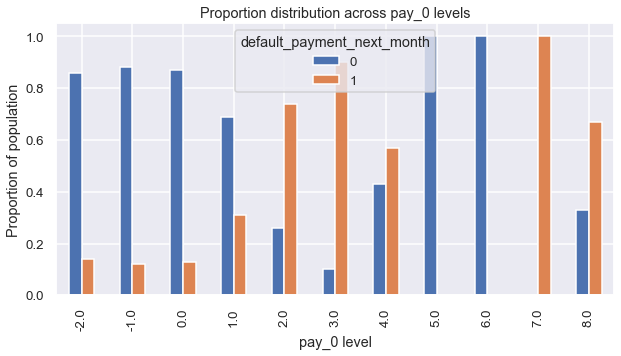

In [35]:
pay_0 = round(pd.crosstab(data.pay_0, data.default_payment_next_month).div(pd.crosstab(data.pay_0, data.default_payment_next_month).apply(sum,1),0),2)
pay_0.sort_values(by='pay_0', ascending = True)
ax = pay_0.plot(kind ='bar', title = 'Proportion distribution across pay_0 levels')
ax.set_xlabel('pay_0 level')
ax.set_ylabel('Proportion of population')

**Untuk mempersingkat tahapan EDA, maka kita dapat melakukannya melalui looping, dimana pada visualisasi dibawah ini akan menunjukan persentase default payment [1]**

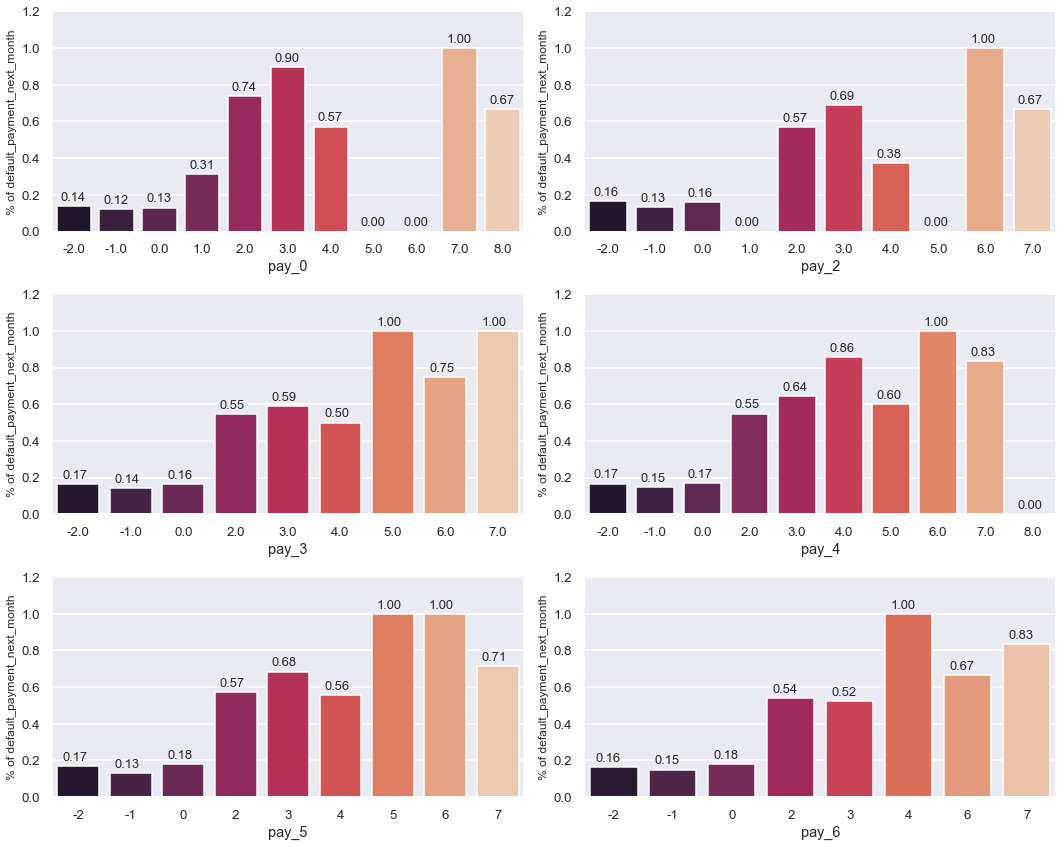

In [36]:
plt.figure(figsize=(15,12))
for i,col in enumerate(Repayment):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default_payment_next_month", data = data, palette = 'rocket', ci = None)
    plt.ylabel("% of default_payment_next_month", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)
plt.show()

**Berdasarkan EDA diatas dapat disimpulkan bahwa `Kolom Pay 0,2,3,4,5,6 memiliki korelasi terhadap kolom target`, oleh karena itu kolom tersebut dapat dipilih pada tahapan select feature**

## **H. *EDA* Kelompok Kolom Bil *(Bil 1 - 6)***

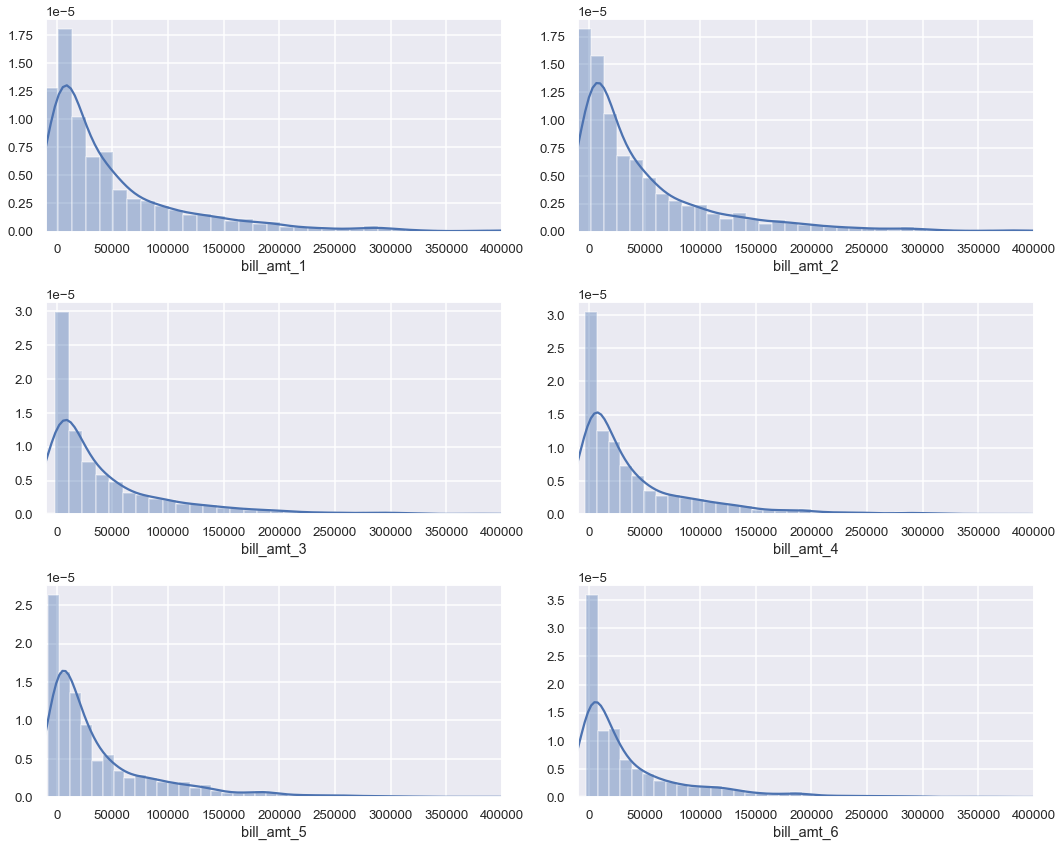

In [37]:
bill_amt_col = ['bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6'] # memasukan nama kolom kedalam variabel bil_amt_col untuk mempermudah proses looping
plt.figure(figsize=(15,12))
for i,col in enumerate(bill_amt_col):    
    plt.subplot(3,2,i + 1)
    sns.distplot(data.loc[:,col])
    plt.xlim(-10000,400000)
    plt.ticklabel_format(style='plain', axis='x') 
    plt.ylabel('')
    plt.tight_layout()
plt.show()

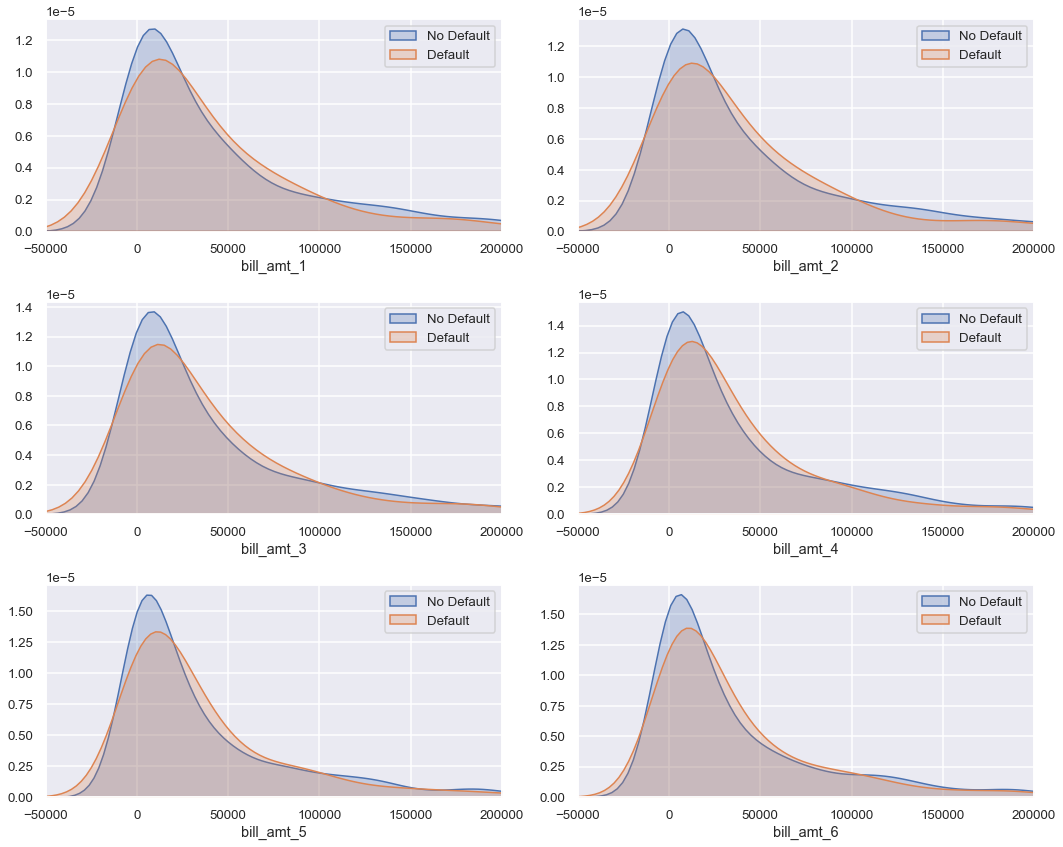

In [38]:
plt.figure(figsize=(15,12))
for i,col in enumerate(bill_amt_col):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(data.loc[(data['default_payment_next_month'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(data.loc[(data['default_payment_next_month'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()
plt.show()

**Berdasarkan hasil EDA yang menunjukan secara umum data pada kolom bill 0 - 6 serupa dan juga didukung dengan nilai heat map yang rendah terhadap kolom target, maka didapatkan bahwa `kolom bill amt 0-6 tidak memiliki korelasi terhadap kolom target,` oleh karena itu kolom tersebut dapat dihapuskan**

## **I. *EDA* Kelompok Kolom *Pay Amt* *(Pay Amt 1 - 6)***

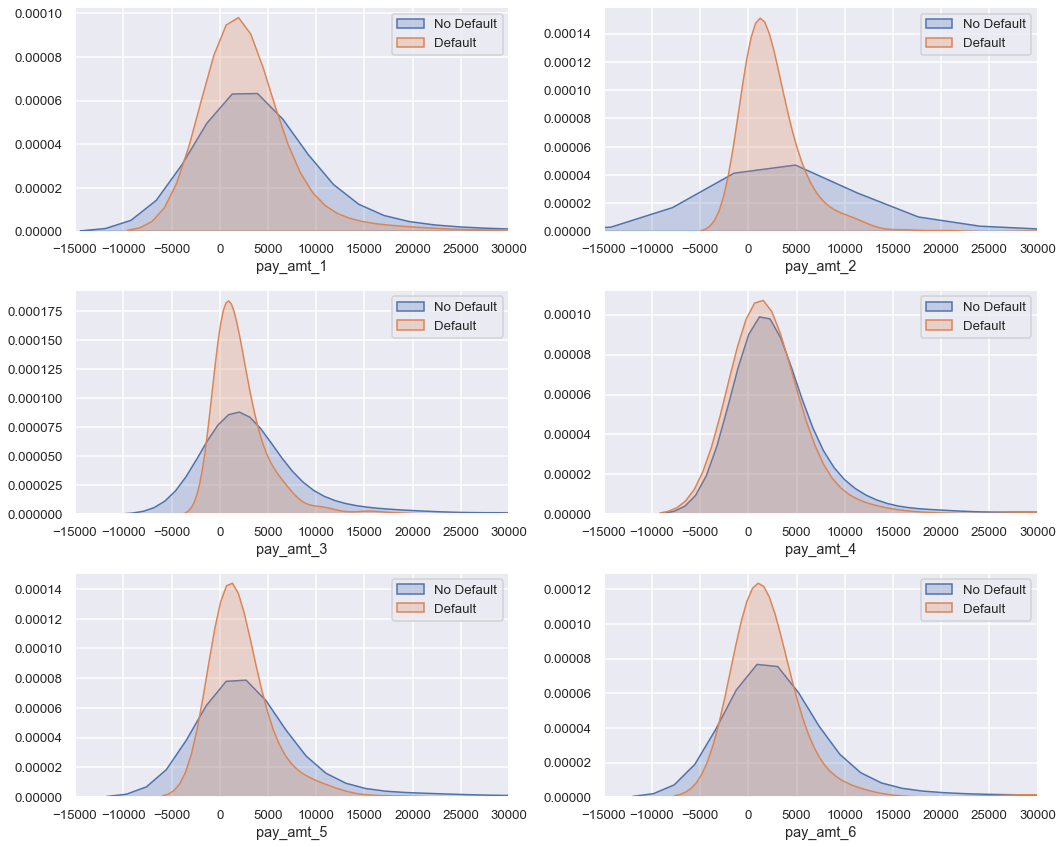

In [39]:
pay_amt_col = ['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6']  # memasukan nama kolom kedalam pay_amt_col untuk mempermudah proses looping
plt.figure(figsize=(15,12))
for i,col in enumerate(pay_amt_col):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(data.loc[(data['default_payment_next_month'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(data.loc[(data['default_payment_next_month'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-15000,30000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()
plt.show()

**Berdasarkan hasil EDA dan heat map didapatkan `bahwa pay_amt memiliki korelasi terhadap kolom target`, namun pada pay_amt 4 tidak terlihat pengaruh pay_amt terhadap default payment sehingga pada kolom pay_amt 4 dapat dihapuskan**

# **V. *Data Preprocessing***

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi *train-dev-test*, transformasi data (normalisasi, *encoding*, dll.), dan proses-proses lain yang dibutuhkan.

## **A. *Get Data for Model Inference***

Tahapan ini digunakan untuk menyimpan beberapa dataset sebagai sample yang kemudian nantinya model yang sudah terbentuk akan diuji menggunakan model inference ini. dan untuk mengetahui apakah model yang terbuat sudah sesuai dengan kondisi nyatanya.

In [40]:
data_inf = data.sample(25, random_state=0) # no random state dipilih secara acak
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2338,20000.0,1,2,2,25.0,4.0,3.0,2.0,0.0,0,0,20610.0,20005.0,19331.0,19333.0,17363.0,16314.0,0.0,0.0,500.0,715.0,326.0,0.0,1
643,50000.0,2,2,1,35.0,0.0,0.0,0.0,0.0,0,0,34265.0,34175.0,33392.0,28340.0,24384.0,22643.0,2000.0,2000.0,2000.0,2000.0,1000.0,1000.0,0
118,170000.0,1,2,2,31.0,0.0,0.0,0.0,0.0,0,2,136330.0,173367.0,160847.0,87399.0,74761.0,67855.0,46000.0,10002.0,3046.0,5000.0,0.0,10000.0,0
252,50000.0,2,2,1,23.0,0.0,0.0,0.0,0.0,0,0,40544.0,41098.0,28383.0,28937.0,29119.0,29334.0,2000.0,1500.0,1432.0,1004.0,1035.0,1178.0,0
1313,310000.0,2,2,2,28.0,0.0,0.0,0.0,0.0,0,0,106468.0,108955.0,112374.0,54762.0,58189.0,57170.0,8000.0,6000.0,5000.0,5000.0,4000.0,5000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,70000.0,2,1,2,23.0,0.0,0.0,0.0,0.0,0,0,7531.0,8545.0,9588.0,10900.0,46462.0,47599.0,1145.0,1188.0,1500.0,36000.0,2000.0,1668.0,1
778,510000.0,2,2,1,38.0,0.0,0.0,0.0,0.0,0,0,95589.0,35224.0,37361.0,39437.0,40292.0,41153.0,2000.0,2700.0,2700.0,1500.0,1500.0,10000.0,0
2179,50000.0,2,3,1,52.0,-2.0,-2.0,-2.0,-2.0,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
92,50000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,0,43607.0,45375.0,46836.0,48635.0,19373.0,20129.0,2500.0,2500.0,3000.0,1500.0,2000.0,3000.0,0


In [41]:
data_train_test = data.drop(data_inf.index) # mengeluarkan data inference dari data train
data_train_test

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [42]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,20000.0,1,2,2,25.0,4.0,3.0,2.0,0.0,0,0,20610.0,20005.0,19331.0,19333.0,17363.0,16314.0,0.0,0.0,500.0,715.0,326.0,0.0,1
1,50000.0,2,2,1,35.0,0.0,0.0,0.0,0.0,0,0,34265.0,34175.0,33392.0,28340.0,24384.0,22643.0,2000.0,2000.0,2000.0,2000.0,1000.0,1000.0,0
2,170000.0,1,2,2,31.0,0.0,0.0,0.0,0.0,0,2,136330.0,173367.0,160847.0,87399.0,74761.0,67855.0,46000.0,10002.0,3046.0,5000.0,0.0,10000.0,0
3,50000.0,2,2,1,23.0,0.0,0.0,0.0,0.0,0,0,40544.0,41098.0,28383.0,28937.0,29119.0,29334.0,2000.0,1500.0,1432.0,1004.0,1035.0,1178.0,0
4,310000.0,2,2,2,28.0,0.0,0.0,0.0,0.0,0,0,106468.0,108955.0,112374.0,54762.0,58189.0,57170.0,8000.0,6000.0,5000.0,5000.0,4000.0,5000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,70000.0,2,1,2,23.0,0.0,0.0,0.0,0.0,0,0,7531.0,8545.0,9588.0,10900.0,46462.0,47599.0,1145.0,1188.0,1500.0,36000.0,2000.0,1668.0,1
21,510000.0,2,2,1,38.0,0.0,0.0,0.0,0.0,0,0,95589.0,35224.0,37361.0,39437.0,40292.0,41153.0,2000.0,2700.0,2700.0,1500.0,1500.0,10000.0,0
22,50000.0,2,3,1,52.0,-2.0,-2.0,-2.0,-2.0,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23,50000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,0,43607.0,45375.0,46836.0,48635.0,19373.0,20129.0,2500.0,2500.0,3000.0,1500.0,2000.0,3000.0,0


## ***B. Splitting Dataset***

Tahapan ini digunakan membagi Data Train yang sebelumnya telah dibuat kemudian membaginya menjadi X_train, X_test, y_train, y_test

In [43]:
# Split between `X` (Features) and `y` (Target)
X = data_train_test.drop('default_payment_next_month', axis=1)
y = data_train_test['default_payment_next_month']
X

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0
2935,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0
2936,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0
2937,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0


In [44]:
# Membagi Train-Set and Test-Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=97)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (2351, 23)
Test Size  :  (588, 23)


Pada data train teriri atas 2355 rows dan 23 kolom sementara pada data test size terdiri atas 589 rows dan 23 kolom

## **C. *Feature Selection***

In [45]:
data.columns #menampilkan kolom yang tersedia pada dataframe [data]

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

In [46]:
select_feature =['limit_balance','age','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3','pay_amt_5','pay_amt_6']

In [47]:
X_train_fix=X_train[select_feature]
X_test_fix=X_test[select_feature]
X_train_fix

,limit_balance,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_5,pay_amt_6
1607,50000.0,40.0,1.0,2.0,0.0,0.0,0,0,0.0,1475.0,600.0,500.0,570.0
1799,120000.0,38.0,2.0,2.0,2.0,2.0,2,2,3000.0,3000.0,3000.0,3600.0,2700.0
2369,10000.0,43.0,-1.0,-1.0,-1.0,0.0,0,-2,2006.0,5805.0,4013.0,4.0,12700.0
393,360000.0,37.0,0.0,0.0,0.0,0.0,0,0,7000.0,8071.0,7029.0,4000.0,9000.0
2848,180000.0,51.0,-1.0,-1.0,-1.0,-1.0,-1,-1,396.0,396.0,396.0,396.0,792.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,310000.0,25.0,0.0,0.0,0.0,0.0,0,0,4000.0,4500.0,4500.0,5000.0,5000.0
2227,320000.0,35.0,1.0,-2.0,-2.0,-2.0,-2,-2,2594.0,2691.0,291.0,291.0,3124.0
105,100000.0,30.0,0.0,0.0,-2.0,-1.0,0,0,0.0,0.0,74550.0,3000.0,3500.0
2467,200000.0,49.0,-1.0,-1.0,2.0,0.0,0,0,10000.0,0.0,20000.0,5000.0,1520.0


## **D. *Handling Missing Value***

Setelah membagi data train, data test, y train dan y test maka tahapan selanjutnya adalah mengecek missing value pada setiap data tersebut

In [48]:
X_train_fix.isna().sum()

limit_balance    0
age              0
pay_0            0
pay_2            0
pay_3            0
                ..
pay_amt_1        0
pay_amt_2        0
pay_amt_3        0
pay_amt_5        0
pay_amt_6        0
Length: 13, dtype: int64

In [49]:
X_test_fix.isna().sum()

limit_balance    0
age              0
pay_0            0
pay_2            0
pay_3            0
                ..
pay_amt_1        0
pay_amt_2        0
pay_amt_3        0
pay_amt_5        0
pay_amt_6        0
Length: 13, dtype: int64

In [50]:
y_test.isna().sum()

0

In [51]:
y_train.isna().sum()

0

## **F. *Split Between Numerical Coloumns and Categorical Coloumns***

Pada tahapan ini kita akan membagi antara kolom yang merupakan jenis kategori dan jenis numerik, dikarenakan pada tahapan awal kita sudah mengetahui bahwa tidak terdapat kolom yang bertipe kategori, maka kita tidak perlu lagi melakukan pembagian terhadap kolom kategori tersebut

In [52]:
# Memasukan kolom numerik kedalam variable num_columns
num_columns = X_train_fix.select_dtypes(include=np.number).columns.tolist()
print('Numerical Columns : ', num_columns)


Numerical Columns :  ['limit_balance', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_5', 'pay_amt_6']


In [53]:
# Membagi Train-Set dan Test-Set
X_train_num = X_train_fix[num_columns]
X_test_num = X_test_fix[num_columns]

## **G. *Handling Outlier***

Pada Tahapan ini akan dilakukan handiling outlier, yang akan dilakukan hanya kepada kolom berjenis **`numerik dan hanya pada data Train`** atau tidak dilakukan pada data test

limit_balance skewness:  1.0130987864707588


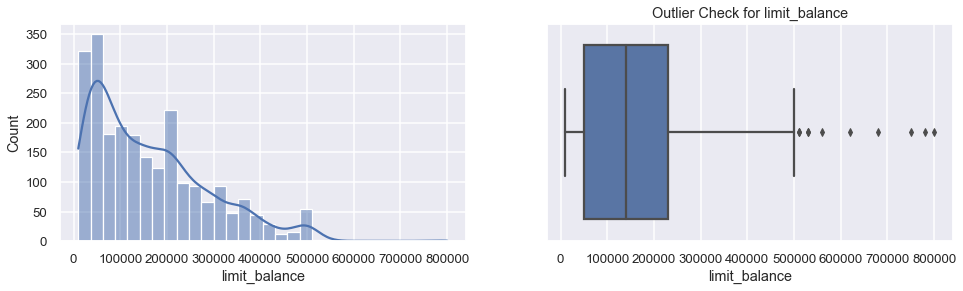

age skewness:  0.7676998461972318


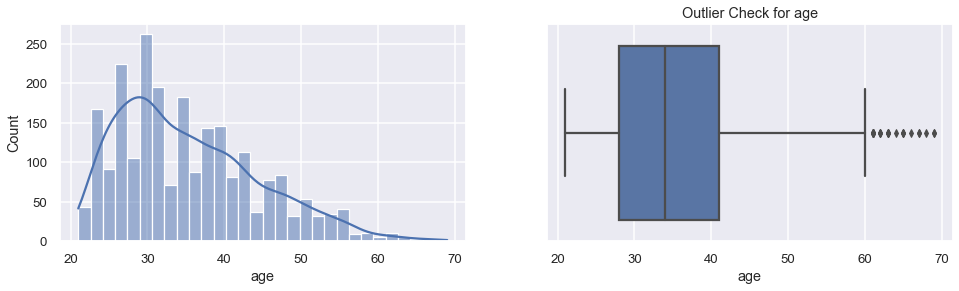

pay_0 skewness:  0.9136175765834115


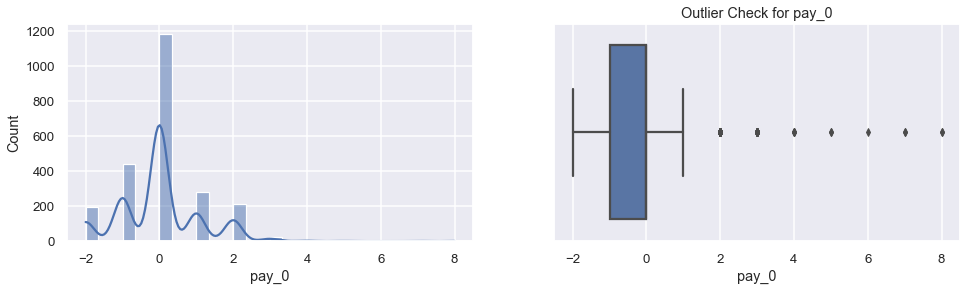

pay_2 skewness:  0.8661642256881774


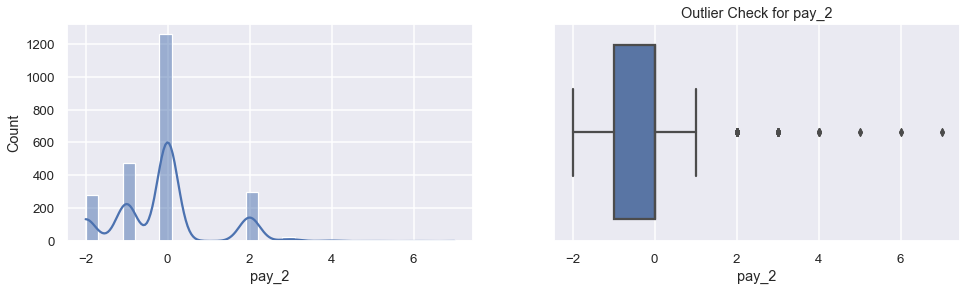

pay_3 skewness:  0.8555199193535036


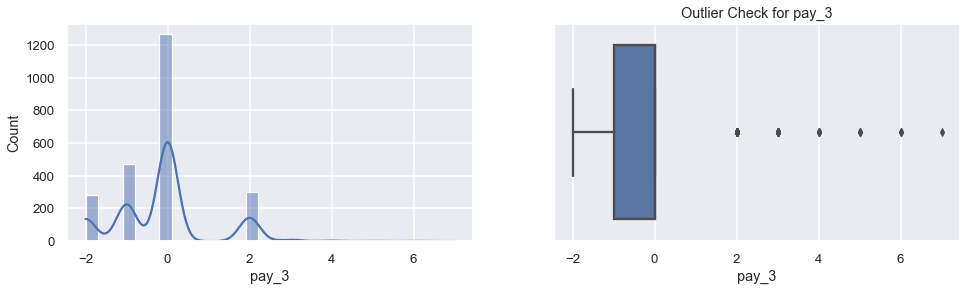

pay_4 skewness:  1.017329389616019


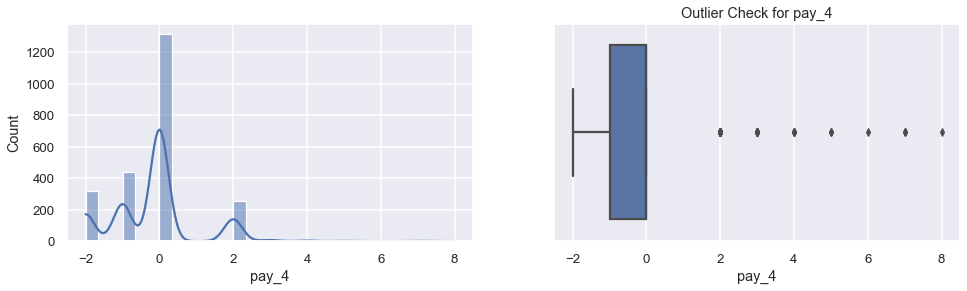

pay_5 skewness:  0.9739965840005833


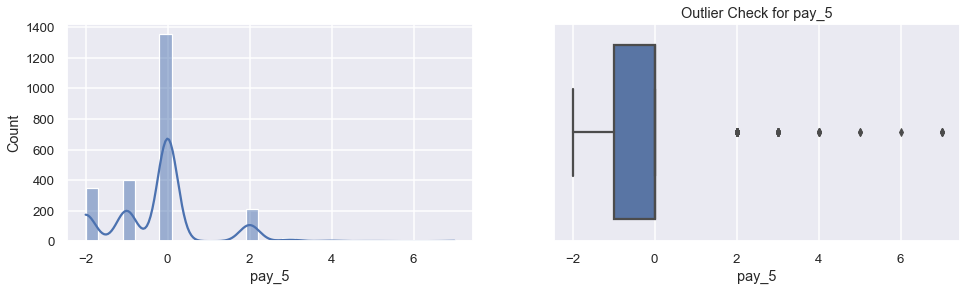

pay_6 skewness:  0.8685297480334969


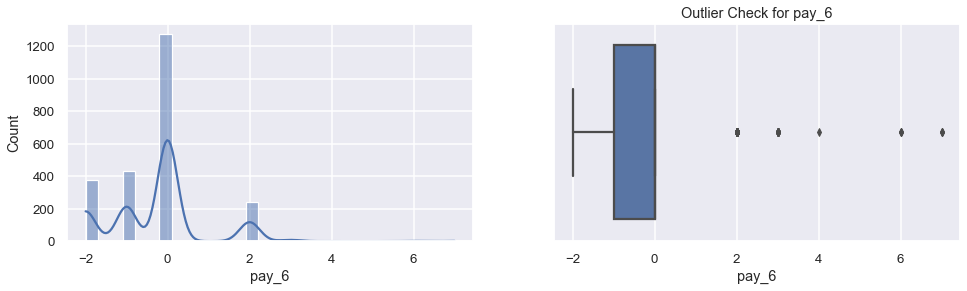

pay_amt_1 skewness:  9.980442402126647


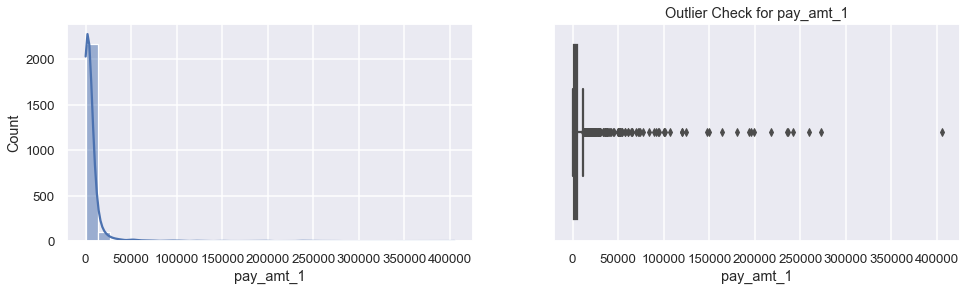

pay_amt_2 skewness:  16.36091911940976


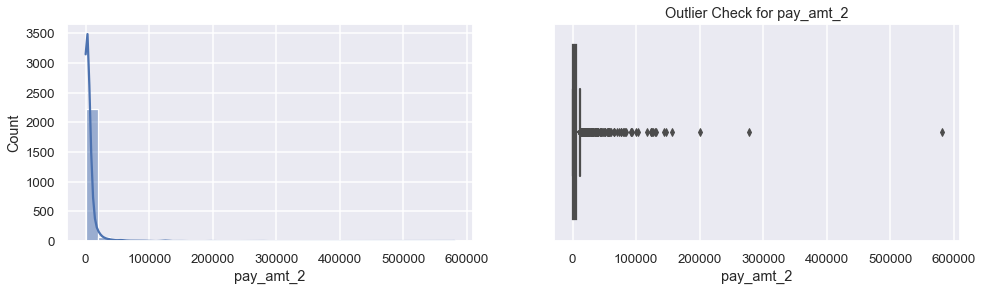

pay_amt_3 skewness:  8.143110612473006


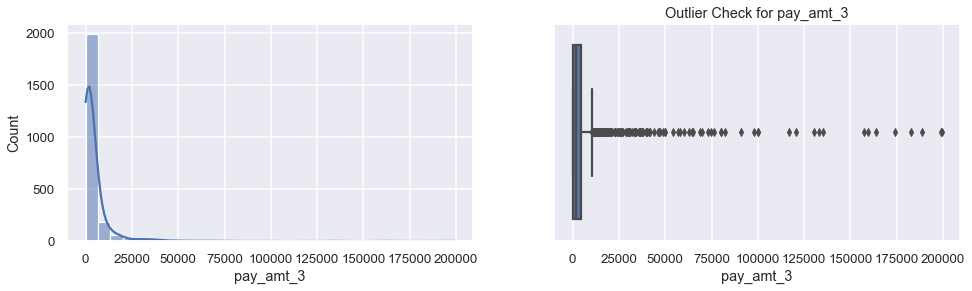

pay_amt_5 skewness:  11.561130318237268


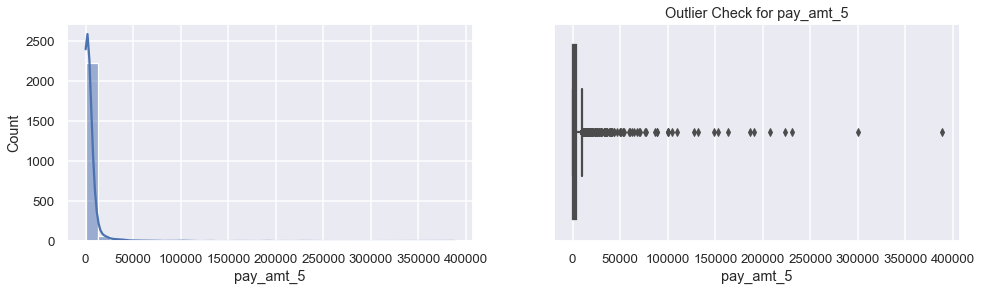

pay_amt_6 skewness:  10.882438605638482


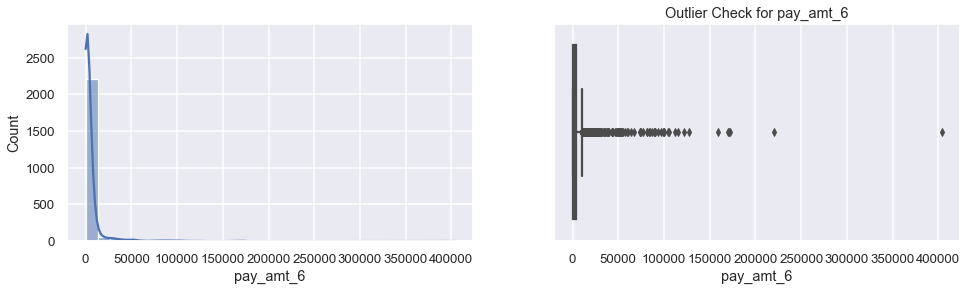

In [54]:
# Membuat Looping Function untuk memvisualisasi distribusi data dan box plot
for i in X_train_num.columns:
    # Define figure size
    plt.figure(figsize=(16, 4))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_num[i],bins=30,kde=True)
     # Boxplot
    plt.subplot(1, 2, 2)
    plt.title('Histogram of %s'%i)
    sns.boxplot(X_train_num[i])
    plt.title('Outlier Check for %s'%i)
    print('%s skewness: '%i,X_train_num[i].skew())
    plt.show()


**Berdasarkan hasil visualisai box plot dan distribusi data diatas didapatkan bahwa, terdapat 2 kolom yang perlu di handling outliernya yaitu pada kolom limit balanced dan kolom age, sementara pada kolom pay amt, outlier yang ditunjukan pada data tersebut tidak dianggap sebagai outlier**

**Pada Tahapan ini handling outlier akan dilakukan dengan menggunakan teknik Capping**

In [55]:
# Function untuk menemukan batas atas dan batas bawah pada data distribusi skew
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

### **Handling Outlier Kolom Limit Balance**

In [56]:
upper_boundary, lower_boundary = find_skewed_boundaries(X_train_num, 'limit_balance', 1.5)
upper_boundary, lower_boundary

(500000.0, -220000.0)

In [57]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

In [58]:
# Metode Membuat Capping
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both', 
                          fold=1.5,
                          variables=['limit_balance'])
windsoriser.fit(X_train_num)
X_train_num_t = windsoriser.transform(X_train_num)

In [59]:
# Memeriksa batas minimum untuk setiap variabel
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)
# Memeriksa batas Maximum untuk setiap variabel
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'limit_balance': -220000.0}
Right Tail Caps :  {'limit_balance': 500000.0}


In [60]:
# Melihat perbedaan nilai max,mean,std setelah dan sebelum dilakukan capping
print('X_train Dataframe - Sebelum Capping')
print(X_train_num['limit_balance'].describe())
print('')
print('X_train Dataframe - Setelah Capping')
print(X_train_num_t['limit_balance'].describe())

X_train Dataframe - Sebelum Capping
count      2351.000000
mean     163177.371331
std      125701.038497
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      230000.000000
max      800000.000000
Name: limit_balance, dtype: float64

X_train Dataframe - Setelah Capping
count      2351.000000
mean     162637.175670
std      123757.225469
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      230000.000000
max      500000.000000
Name: limit_balance, dtype: float64


limit_balance - Sebelum Capping


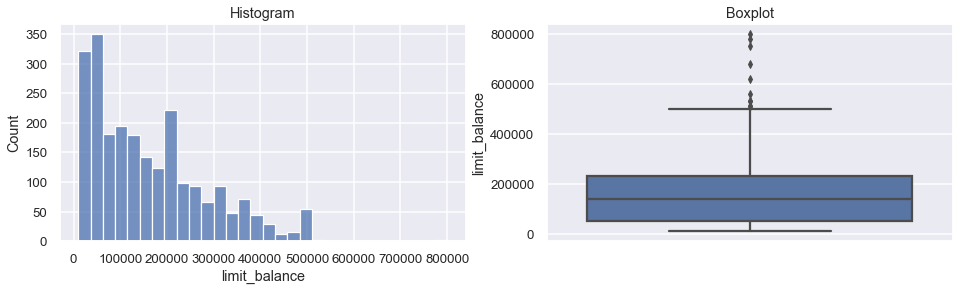


limit_balance - Setalah Capping


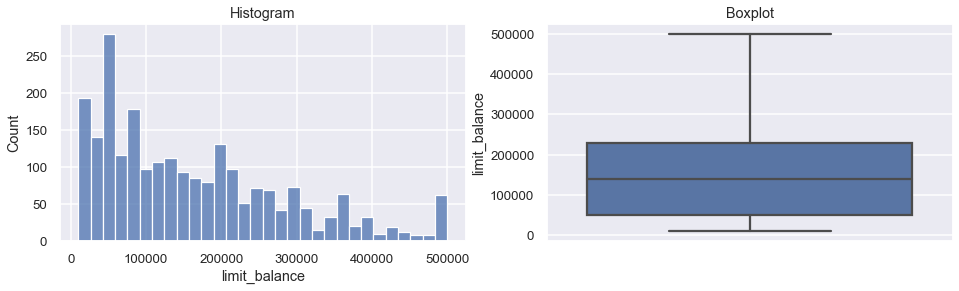

In [61]:
# Visualisasi distribusi sebaran data dan box plot sebelum dan sesudah dilakukan capping
print('limit_balance - Sebelum Capping')
diagnostic_plots(X_train_num, 'limit_balance')
print('\nlimit_balance - Setalah Capping')
diagnostic_plots(X_train_num_t, 'limit_balance')

**Berdasarkan Hasil Visualisasi diatas didapatkan bahwa setelah melakukan handling outlier menggunakan teknik capping, outlier yang sebelumnya berada diatas atau sebelah kanan box plot, sudah hilang dan distribusi datanya menjadi lebih terdistribusi normal**

### **Handling Outlier Kolom Age**

In [62]:
upper_boundary, lower_boundary = find_skewed_boundaries(X_train_num, 'age', 1.5)
upper_boundary, lower_boundary

(60.5, 8.5)

In [63]:
# Metode Membuat Capping
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both', 
                          fold=1.5,
                          variables=['age'])
windsoriser.fit(X_train_num)
X_train_num_t = windsoriser.transform(X_train_num)

In [64]:
# Memeriksa batas minimum untuk setiap variabel
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)
# Memeriksa batas Maximum untuk setiap variabel
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'age': 8.5}
Right Tail Caps :  {'age': 60.5}


In [65]:
print('X_train Dataframe - Sebelum Capping')
print(X_train_num['age'].describe())
print('')
print('X_train Dataframe - Sesudah Capping')
print(X_train_num_t['age'].describe())

X_train Dataframe - Sebelum Capping
count    2351.000000
mean       35.318162
std         9.170443
min        21.000000
25%        28.000000
50%        34.000000
75%        41.000000
max        69.000000
Name: age, dtype: float64

X_train Dataframe - Sesudah Capping
count    2351.000000
mean       35.284985
std         9.068887
min        21.000000
25%        28.000000
50%        34.000000
75%        41.000000
max        60.500000
Name: age, dtype: float64


age - Sebelum Capping


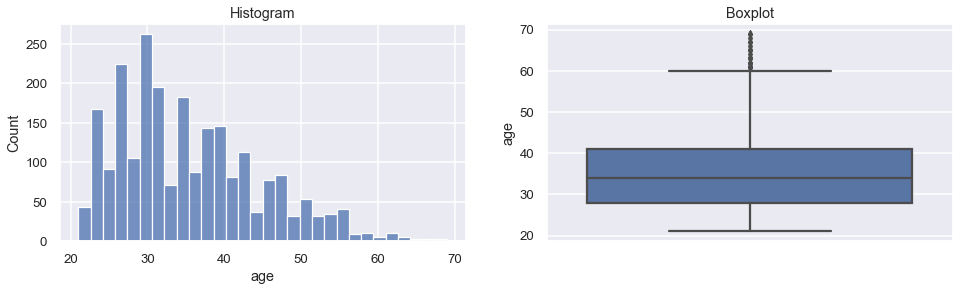


age - Sesudah Capping


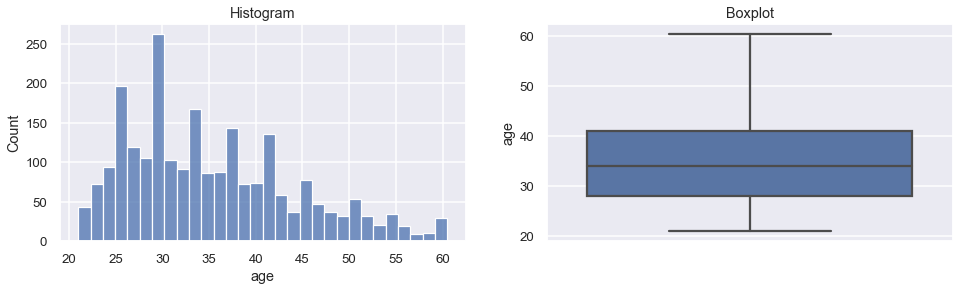

In [66]:
print('age - Sebelum Capping')
diagnostic_plots(X_train_num, 'age')
print('\nage - Sesudah Capping')
diagnostic_plots(X_train_num_t, 'age')

## **G. *Feature Scaling, Encoding***

**Dikarenakan kita akan `menggunakan pipeline` maka pada tahapan Feature Scalling dan Encoding akan dimasukan kedalam flow yang terdapat pada pipeline, dan berdasarkan informasi yang sudah kita dapatkan sebelumnya, bahwa seluruh kolom sudah bertipe numerik, oleh karena itu tahapan encoding tidak diperlukan**

In [67]:
X_train_final = pd.DataFrame(X_train_num_t, columns=num_columns) #memasukan data hasil yang sudah dihandling outlier kedalam dataframe X_train_final
X_test

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1389,140000.0,2,2,1,41.0,0.0,0.0,0.0,0.0,2,0,43616.0,44710.0,45661.0,50880.0,49934.0,51106.0,2100.0,2000.0,6000.0,0.0,2000.0,4200.0
1501,140000.0,1,1,2,26.0,0.0,0.0,0.0,0.0,-1,0,84729.0,102693.0,41266.0,39634.0,115440.0,133580.0,26894.0,1500.0,11888.0,115440.0,23900.0,10586.0
2839,150000.0,2,2,1,30.0,-1.0,-1.0,0.0,0.0,-1,-1,35213.0,115041.0,135090.0,80085.0,35940.0,38460.0,115041.0,66066.0,2031.0,35940.0,38460.0,41154.0
2185,150000.0,2,1,1,35.0,1.0,-2.0,-2.0,-2.0,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1111,30000.0,2,2,1,26.0,2.0,0.0,0.0,0.0,0,2,25369.0,23073.0,21520.0,18669.0,15710.0,15308.0,1700.0,1600.0,700.0,1401.0,0.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,160000.0,1,2,2,30.0,-1.0,-1.0,-1.0,-1.0,-1,-2,3197.0,1936.0,2329.0,2332.0,-4.0,-4.0,1941.0,2645.0,2339.0,0.0,0.0,0.0
922,90000.0,2,2,1,28.0,0.0,0.0,0.0,0.0,0,0,45537.0,43173.0,36230.0,28068.0,20229.0,20650.0,3000.0,2500.0,2000.0,2000.0,1100.0,0.0
543,230000.0,2,2,2,26.0,0.0,0.0,0.0,0.0,0,0,2656.0,3678.0,4650.0,3234.0,4174.0,5100.0,1074.0,1046.0,1060.0,1000.0,1000.0,5000.0
579,260000.0,1,5,1,37.0,0.0,0.0,0.0,0.0,0,0,9801.0,11115.0,11930.0,12954.0,14246.0,15733.0,1485.0,1300.0,1229.0,1521.0,1728.0,1610.0


# **VI. *Model Definition***

# **Pipeline**

**Membuat tahapan dalam pipeline, yang berisikan preprocessing, hingga modeling data**

In [68]:
# Mengelompokan masing-masing kolom untuk perlakuan preprocessing terutama pada tahapan scalling
numeric_features = ['limit_balance','age','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5','pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_5','pay_amt_6'] 
numeric_transformer_sc = Pipeline([("scaler1", StandardScaler())])

**Kolom yang terdapat pada data train akan dilakukan scalling menggunakan Standar Scaller**

In [69]:
# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num1", numeric_transformer_sc, numeric_features),
    ]
)

**Membuat Pipeline pada setiap model**

In [70]:
# Logistic Regression Pipeline
logistic_pipe = Pipeline([('preprocessing', preprocessor), ('classifier', LogisticRegression())])
# Support Vector Machine Pipeline
svc_pipe = Pipeline([('preprocessing', preprocessor), ('classifier', SVC())])
# Decision Tree Pipeline
tree_pipe = Pipeline([('preprocessing', preprocessor), ('classifier', DecisionTreeClassifier())])
# Random Forest Pipeline
forest_pipe = Pipeline([('preprocessing', preprocessor), ('classifier', RandomForestClassifier())])
# Extreme Gradient Boosting Pipeline
xgb_pipe = Pipeline([('preprocessing', preprocessor), ('classifier', XGBClassifier(verbosity = 0, silent=True))])
# K-Nearest Neighbors Pipeline
knn_pipe = Pipeline([('preprocessing', preprocessor), ('classifier', KNeighborsClassifier())])
# Naive Bayes Pipeline
naive_pipe = Pipeline([('preprocessing', preprocessor), ('classifier', GaussianNB())])

# **VII. *Model Training***

### **A. Melakukan model training dengan menggunakan parameter default (baseline model) dari setiap algoritma**

Dikarenakan pada tahapan ini kita diminta untuk menggunakan parameter default, oleh karena itu kita tidak perlu mendefinisikan setiap parameter yang ada oleh setiap algoritma, dimana secara otomatis akan tersetting menjadi default pada keseluruhan parameter

In [71]:
# Menjalankan model training pada setiap algoritma
logistic_pipe.fit(X_train_final,y_train)
svc_pipe.fit(X_train_final,y_train)
tree_pipe.fit(X_train_final,y_train)
forest_pipe.fit(X_train_final,y_train)
xgb_pipe.fit(X_train_final,y_train)
knn_pipe.fit(X_train_final,y_train)
naive_pipe.fit(X_train_final,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler1',
                                                                   StandardScaler())]),
                                                  ['limit_balance', 'age',
                                                   'pay_0', 'pay_2', 'pay_3',
                                                   'pay_4', 'pay_5', 'pay_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_5',
                                                   'pay_amt_6'])])),
                ('classifier', GaussianNB())])

### **B. Menggunakan `cross_val_score` untuk mencari akurasi `mean` dan `std` dari setiap model**

In [72]:
print('Cross Validation Accuracy Logistic Regresion = ', np.mean(cross_val_score(logistic_pipe, X_train_final, y_train, cv=5)))
print('Cross Validation Accuracy Support Vector Machine = ', np.mean(cross_val_score(svc_pipe, X_train_final, y_train, cv=5)))
print('Cross Validation Accuracy Decision Tree  = ', np.mean(cross_val_score(tree_pipe, X_train_final, y_train, cv=5)))
print('Cross Validation Accuracy Random Forest= ', np.mean(cross_val_score(forest_pipe, X_train_final, y_train, cv=5)))
print('Cross Validation Accuracy Extreme Gradient Boosting= ', np.mean(cross_val_score(xgb_pipe, X_train_final, y_train, cv=5)))
print('Cross Validation Accuracy K-Nearest Neighbors = ', np.mean(cross_val_score(knn_pipe, X_train_final, y_train, cv=5)))
print('Cross Validation Accuracy Naive Bayes = ', np.mean(cross_val_score(naive_pipe, X_train_final, y_train, cv=5)))

Cross Validation Accuracy Logistic Regresion =  0.833692008853955
Cross Validation Accuracy Support Vector Machine =  0.8426263721371461
Cross Validation Accuracy Decision Tree  =  0.752440710123323
Cross Validation Accuracy Random Forest=  0.8341166373040609
Cross Validation Accuracy Extreme Gradient Boosting=  0.809871256267787
Cross Validation Accuracy K-Nearest Neighbors =  0.8188047160861907
Cross Validation Accuracy Naive Bayes =  0.4738338528255861


In [73]:
scores = cross_val_score(logistic_pipe, X_train_final, y_train, cv=5)
scores2 = cross_val_score(svc_pipe, X_train_final, y_train, cv=5)
scores3 = cross_val_score(tree_pipe, X_train_final, y_train, cv=5)
scores4 = cross_val_score(forest_pipe, X_train_final, y_train, cv=5)
scores5 = cross_val_score(xgb_pipe, X_train_final, y_train, cv=5)
scores6 = cross_val_score(knn_pipe, X_train_final, y_train, cv=5)
scores7 = cross_val_score(naive_pipe, X_train_final, y_train, cv=5)

**Untuk mempermudah dalam penilaian pada setiap algoritma, maka dilakukan proses looping pada setiap algoritma tersebut**

In [74]:
#Menggunakan Looping untuk mempermudah dalam meliihat skor pada cross validation
model_name = [scores,scores2,scores3,scores4,scores5,scores6,scores7]
label = ['Logistic Regresion','Support Vector Machine','Decision Tree','Random Forest','Extreme Gradient Boosting','K-Nearest Neighbors','Naive Bayes'] #label sesuai dengan jenis model
a = 0
for i in model_name:
    print(f'Cross Validation {label[a]}')
    print('scores= ', i)
    print('scores mean= ', i.mean())
    print('scores std = ', i.std())
    print('scores mean + scores std = ', i.mean()+i.std())
    print('scores mean - scores std = ', i.mean()-i.std())
    print(f'\n') # digunakan untuk pemisah per model
    a=a+1 

Cross Validation Logistic Regresion
scores=  [0.82377919 0.84042553 0.84255319 0.82978723 0.83191489]
scores mean=  0.833692008853955
scores std =  0.006935851922795948
scores mean + scores std =  0.840627860776751
scores mean - scores std =  0.826756156931159


Cross Validation Support Vector Machine
scores=  [0.82802548 0.86382979 0.85744681 0.83191489 0.83191489]
scores mean=  0.8426263721371461
scores std =  0.014912329183640636
scores mean + scores std =  0.8575387013207867
scores mean - scores std =  0.8277140429535055


Cross Validation Decision Tree
scores=  [0.76220807 0.73191489 0.76808511 0.74042553 0.74255319]
scores mean=  0.7490373582689615
scores std =  0.013752607528782362
scores mean + scores std =  0.7627899657977438
scores mean - scores std =  0.7352847507401791


Cross Validation Random Forest
scores=  [0.83014862 0.84680851 0.83617021 0.83191489 0.82340426]
scores mean=  0.8336892984595925
scores std =  0.0077425537542397385
scores mean + scores std =  0.8414318522

In [75]:
Cross_Validation = pd.DataFrame(columns=['Model','scores mean', 'scores std', 'scores mean + scores std', 'scores mean - scores std'])
a = 0
for i in model_name:
    Cross_Validation.loc[a] = [label[a],round(i.mean(),3), round(i.std(),3), round(i.mean()+i.std(),3), round(i.mean()-i.std(),3)]
    a=a+1 
Cross_Validation.sort_values(by='scores mean', ascending=False)

,Model,scores mean,scores std,scores mean + scores std,scores mean - scores std
1,Support Vector Machine,0.843,0.015,0.858,0.828
0,Logistic Regresion,0.834,0.007,0.841,0.827
3,Random Forest,0.834,0.008,0.841,0.826
5,K-Nearest Neighbors,0.819,0.011,0.830,0.808
4,Extreme Gradient Boosting,0.810,0.007,0.817,0.803
2,Decision Tree,0.749,0.014,0.763,0.735
6,Naive Bayes,0.474,0.051,0.525,0.423


**Berdasarkan Hasil Cross Validation kita mendapatkan model dengan nilai mean tertinggi yaitu model `Support Vector Machine`, dengan score 0.84 dan berada pada rentang 0.830 - 0.85 dengan nilai std yang terendah kedua yaitu bernilai 0.010**

## **C. Hyperparameter Tuning pada algoritma terbaik**

Berdasarkan nilai pada cross validation didapatkan bahwa **`Model Support Vector Machine`** merupakan model yang terbaik, tahapan selanjutnya adalah melakukan Hyperparameter Tuning pada algoritma terbaik tersebut dengan menggunakan `GridSearchCV() dan kemudian membandingkan performansi antara sebelum dan sesudah dilakukan Hyperparameter Tuning.


In [76]:
svc_params = {'classifier__C': [0.001, 0.1,1, 10, 100],
              'classifier__gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
              'classifier__kernel': ['rbf']}

**Melakukan Grid Search pada algoritma model Support Vector Machine**

In [77]:
svc_best = GridSearchCV(svc_pipe, param_grid=svc_params, cv=5, verbose = 3)
svc_best.fit(X_train_final,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END classifier__C=0.001, classifier__gamma=10, classifier__kernel=rbf;, score=0.783 total time=   0.0s
[CV 2/5] END classifier__C=0.001, classifier__gamma=10, classifier__kernel=rbf;, score=0.785 total time=   0.0s
[CV 3/5] END classifier__C=0.001, classifier__gamma=10, classifier__kernel=rbf;, score=0.785 total time=   0.0s
[CV 4/5] END classifier__C=0.001, classifier__gamma=10, classifier__kernel=rbf;, score=0.785 total time=   0.0s
[CV 5/5] END classifier__C=0.001, classifier__gamma=10, classifier__kernel=rbf;, score=0.785 total time=   0.0s
[CV 1/5] END classifier__C=0.001, classifier__gamma=1, classifier__kernel=rbf;, score=0.783 total time=   0.0s
[CV 2/5] END classifier__C=0.001, classifier__gamma=1, classifier__kernel=rbf;, score=0.785 total time=   0.0s
[CV 3/5] END classifier__C=0.001, classifier__gamma=1, classifier__kernel=rbf;, score=0.785 total time=   0.0s
[CV 4/5] END classifier__C=0.001, classifier_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num1',
                                                                         Pipeline(steps=[('scaler1',
                                                                                          StandardScaler())]),
                                                                         ['limit_balance',
                                                                          'age',
                                                                          'pay_0',
                                                                          'pay_2',
                                                                          'pay_3',
                                                                          'pay_4',
                                                                          'pay_5',
                                            

In [78]:
# Menampilkan hasil best parameter dan nilai cross validation pada berdasarkan hasil grid search
print("Best parameters: {}".format(svc_best.best_params_))
print("Best cross-validation score: {:.2f}".format(svc_best.best_score_))

Best parameters: {'classifier__C': 10, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
Best cross-validation score: 0.84


**Berdasarkan hasil grid search didapatkan `hyper parameter terbaik yaitu : 'classifier__C': 10, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'`**

Tahapan selanjutnya adalah membandingkan performansi antara sebelum dan sesudah dilakukan Hyperparameter Tuning, yang akan ditampilkan pada tahapan model evalution

# **VIII. *Model Evaluation***

Pada bagian ini, dilakukan evaluasi model dengan menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. disertakan visualisasi tren performa dan/atau tingkat kesalahan model, melakukan analisis terkait dengan hasil pada model dan menuliskan hasil analisis tersebut, untuk evaluasi yang akan dilakukan Metric evaluation yang akan digunakan adalah **F1-score** dan **ROC-AUC** score karena terdapat **label imbalance** pada dataset.

**Variabel default (baseline) dan best parameter** untuk mempermudah dalam tahapan selanjutnya dan meminimalisir kesalahan tau pemanggilan variable, pada tahapan ini akan menampilkan nama varibel best param dan default

**`svc_pipe = adalah variable parameter default`**

**`svc_best = adalah variable best parameter berdasarkan grid search`**

In [79]:
%timeit svc_pipe.fit(X_train_final, y_train) # model tanpa hyperparameter (default)
%timeit svc_best.fit(X_train_final, y_train) # best paramater berdasarkan grid search

237 ms ± 86.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END classifier__C=0.001, classifier__gamma=10, classifier__kernel=rbf;, score=0.783 total time=   0.0s
[CV 2/5] END classifier__C=0.001, classifier__gamma=10, classifier__kernel=rbf;, score=0.785 total time=   0.0s
[CV 3/5] END classifier__C=0.001, classifier__gamma=10, classifier__kernel=rbf;, score=0.785 total time=   0.0s
[CV 4/5] END classifier__C=0.001, classifier__gamma=10, classifier__kernel=rbf;, score=0.785 total time=   0.0s
[CV 5/5] END classifier__C=0.001, classifier__gamma=10, classifier__kernel=rbf;, score=0.785 total time=   0.0s
[CV 1/5] END classifier__C=0.001, classifier__gamma=1, classifier__kernel=rbf;, score=0.783 total time=   0.0s
[CV 2/5] END classifier__C=0.001, classifier__gamma=1, classifier__kernel=rbf;, score=0.785 total time=   0.0s
[CV 3/5] END classifier__C=0.001, classifier__gamma=1, classifier__kernel=rbf;, score=0.

**Membuat dataframe untuk melihat evaluasi model**

untuk memudahkan dalam membandingkan antara model yang telah dilakukan hyperparameter tuning, maka akan dibuatkan dataframe yang berisikan informasi terkait score validation dan ROC.

In [80]:
# Membuat data frame untuk model evaluasi
evaluations = pd.DataFrame(columns=['model', 'training_score', 'validation_score', 'macro_f1_score', 'roc_auc_score'])
evaluations.loc[0] = ['SVC Hyperparameter Tuning', round(svc_best.score(X_train_final, y_train), 3), round(svc_best.score(X_test, y_test), 3), round(f1_score(y_test, svc_best.predict(X_test), average='macro'), 3), round(roc_auc_score(y_test, svc_best.predict(X_test)), 3)]
evaluations.loc[1] = ['SVC Baseline/Parameter Default', round(svc_pipe.score(X_train_final, y_train), 3), round(svc_pipe.score(X_test, y_test), 3), round(f1_score(y_test, svc_pipe.predict(X_test), average='macro'), 3), round(roc_auc_score(y_test, svc_pipe.predict(X_test)), 3)]
evaluations

,model,training_score,validation_score,macro_f1_score,roc_auc_score
0,SVC Hyperparameter Tuning,0.846,0.823,0.665,0.640
1,SVC Baseline/Parameter Default,0.848,0.821,0.666,0.642


Menghitung **False Positive Rate** dan **True Positive Rate** menggunakan `roc_curve()` dan juga membuat list yang berisi confusion matrix untuk setiap model.

In [81]:
svc_false_positive_rate_val, svc_true_positive_rate_val, svc_thresholds_val = roc_curve(y_test, svc_best.predict(X_test)) # hyperparamater 
svc_default_false_positive_rate_val, svc_default_true_positive_rate_val, svc_default_thresholds_val = roc_curve(y_test, svc_pipe.predict(X_test)) # default
confusions = [confusion_matrix(y_test, svc_best.predict(X_test)), # hyperparamater 
            confusion_matrix(y_test, svc_pipe.predict(X_test))] # default

**Membuat Confusions Matrix untuk melihat accuracy,recall,precision dan f1 score**

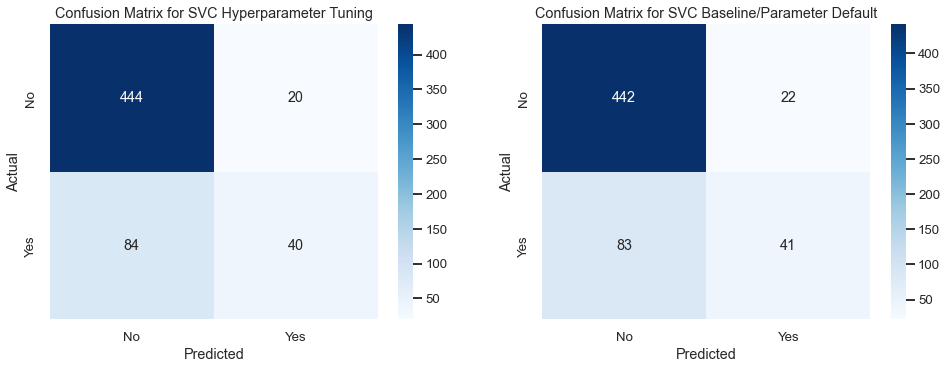

In [82]:
plt.figure(figsize=(25, 25))
for i in range(len(confusions)):
    plt.subplot(4, 3, i+1)
    fig = sns.heatmap(confusions[i], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {evaluations.iloc[i, 0]}')
    fig.set_xticklabels(['No', 'Yes'])
    fig.set_yticklabels(['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()

In [83]:
print(classification_report(y_test, svc_best.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       464
           1       0.67      0.32      0.43       124

    accuracy                           0.82       588
   macro avg       0.75      0.64      0.66       588
weighted avg       0.80      0.82      0.80       588



In [84]:
print(classification_report(y_test, svc_pipe.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       464
           1       0.65      0.33      0.44       124

    accuracy                           0.82       588
   macro avg       0.75      0.64      0.67       588
weighted avg       0.80      0.82      0.80       588



**Insight Berdasarkan Classification Report dan Confusions Matrix**

Berdasarkan skor pada classifcation report, menunjukan bahwa model dengan baseline/default dapat sedikit lebih baik dalam memprediksi, pengguna dengan default payment yes/gagal bayar pada bulan selanjutnya, dan juga mendapatkan nilai yang sedikit lebih tinggi pada recall, secara umum perbedaan antara model yang sudah dituning dan default tidak terlihat perbedaan yang signifikan

**Membandingkan ROC_AUC**

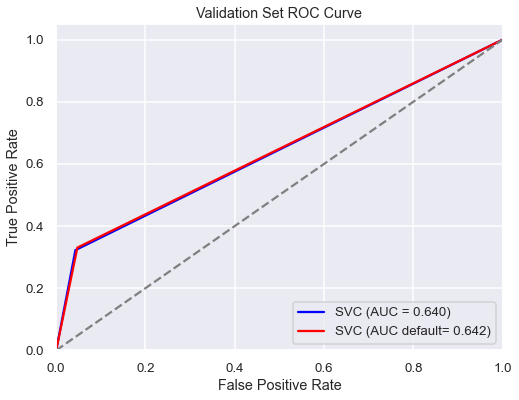

In [85]:
plt.figure(figsize=(8, 6))
plt.plot(svc_false_positive_rate_val, svc_true_positive_rate_val, color='blue', label=f'SVC (AUC = {roc_auc_score(y_test, svc_best.predict(X_test)):.3f})') #best hyperparameter
plt.plot(svc_default_false_positive_rate_val, svc_default_true_positive_rate_val, color='red', label=f'SVC (AUC default= {roc_auc_score(y_test, svc_pipe.predict(X_test)):.3f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Set ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [86]:
evaluations.sort_values(by='roc_auc_score', ascending=False)

,model,training_score,validation_score,macro_f1_score,roc_auc_score
1,SVC Baseline/Parameter Default,0.848,0.821,0.666,0.642
0,SVC Hyperparameter Tuning,0.846,0.823,0.665,0.640


In [87]:
Cross_Validation.sort_values(by='scores mean', ascending=False) # hanya untuk menampilkan hasil model training untuk lebih memudahkan dalam menarik insight
# keseluruhan model yang digunakan menggunakan default parameter

,Model,scores mean,scores std,scores mean + scores std,scores mean - scores std
1,Support Vector Machine,0.843,0.015,0.858,0.828
0,Logistic Regresion,0.834,0.007,0.841,0.827
3,Random Forest,0.834,0.008,0.841,0.826
5,K-Nearest Neighbors,0.819,0.011,0.830,0.808
4,Extreme Gradient Boosting,0.810,0.007,0.817,0.803
2,Decision Tree,0.749,0.014,0.763,0.735
6,Naive Bayes,0.474,0.051,0.525,0.423


**Evaluasi Terhadap Model dan Interpretasi terhadap data**

Dari hasil evaluasi pada 7 model diatas dapat diketahui `model dengan Naive-Bayes merupakan model dengan nilai score cross validation terendah`, dan jika disandingkan dengan ke 6 model lainnya model, nilai model naive bayes sangat jauh berada dibawah pada ke enam model tersebut. sehingga pemilihan model menggunakan algoritma naive bayes akan sangat tidak disarankan. `model Support Vector Machine merupakan merupakan model dengan nilai cross validation tertinggi dan dipilih sebagai algoritma yang akan dilakukan hyperparameter tuning pada tahapan selanjutnya`. 

Berdasarkan hasil skoring dan pengujian model didapatkan bahwa, `model yang terbentuk baik berdasarkan paramater default ataupun dengan hyperparameter tuning`, kedua model tersebut `sudah cukup baik dalam melakukan prediksi` terhadap `default payment/target`, berdasarkan nilai yang dihasilkan didapatkan bahwa model `yang terbentuk good fit`, dimana `nilai` pada `training score dan test/validation score tidak berbeda jauh`, sehingga model dapat dikategorikan goodfit. 

Dalam pembentukan model ini saya ingin melihat model yang dapat memprediksi klasifikasi default payment baik yes/no secara akurat pada kedua jenis tersebut, jadi `metrik` yang perlu diperhatikan adalah `metrik roc auc ataupun f1 score`. alasan menggunakan metrik f1 score/roc auc score adalah, **kesalahan pada prediksi default payment, baik [yes/no] memiliki risiko yang sama sama tidak baik untuk perusahaan**, dimana ketika kita salah memprediksi pengguna kartu kredit yang sebenarnya memiliki kemampuan untuk membayar tagihan pada bulan depan, dan kita memprediksi bahwa pengguna tersebut akan gagal bayar pada bulan depan, maka akan terjadi perubahan strategi promosi dimana biasanya pengguna tersebut sering ditawarkan untuk menggunakan limit untuk berbelanja atau bahkan diberikan bonus atau limit tambahan, maka perusahaan akan berusaha untuk menurunkan penawaran promosi promosi menarik kepada pengguna tersebut, sehingga yang seharusnya perusahaan bisa mendapatkan pendapatan dengan potensi lebih besar melalui pengeluaran pengguna kartu kredit, maka pada kondisi tersebut perusahaan akan kehilangan kesempatan tersebut. begitu pula sebaliknya dimana ketika kita yakin bahwa pengguna kartu kredit tersebut akan dapat membayar tagihan dibulan selanjutnya, maka biasanya strategi promosi terkait penggunaan limit kartu kredit pun akan ditingkatkan pada pengguna tersebut , baik melalui promosi terkait potongan biaya bunga cicilan ataupun bonus yang didapatkan ketika pengguna dapat membeli suatu barang menggunakan kartu kredit, dan kenyataannya pada bulan berikutnya pengguna tidak dapat membayar tagihan tersebut, hal tersebut tentu akan merugikan perusahan kartu kredit tersebut. kedua hal tersebut yang membuat akurasi prediksi pada kedua klasifikasi target tersebut sangat penting. sehingga diperlukan model yang dapat memprediksi kedua klasifikasi tersebut dengan balanced dan akurat. 

Jika dilihat dari **confusion matrix dari kedua model tersebut (Support Vector Machine default vs hyperparamater tuning)**, walaupun **model SVC hyperparamater tuning memiliki True Positive sedikit lebih banyak dari model SVC default**, tetapi model `SVC default` ini memiliki **Type 2 Error [default payment/yes]** `(False Negatif)` yang `jauh lebih sedikit` dari model `SVC hyper parameter`, hal tersebut menunjukan bahwa model default lebih dapat meminimalisir kesalahan prediksi terhadap pengguna kartu kredit yang tidak gagal bayar. Dan untuk m`odel SVC dengan hyperparameter memiliki True Positive lebih besar` dibandingkan dengan `SV default` dan **Type 1 Error [default payment/no]** (False Positif) terendah.

**Kekurangan dan Kelebihan Model**

Kekurangan yang terdapat pada model ini adalah nilai ROC/f1 skor masih berada pada rentang 0,6 - 0,7 belum dapat mencapai excellent classification modelling, hal tersebut dapat dikarenakan terdapat imbalanced pada data target, untuk meningkatkan nilai tersebut, saya menyarankan untuk mensamakan jumlah target yaitu dapat menggunakan Smote. selain itu pengambilan data yang dilakukan juga tidak mengambil keseluruhan dataset pada kolom, sehingga dapat menimbulkan feature yang seharusnya memilki korelasi yang kuat terhadap target namun tidak terselect saat query. 
Kelebihan model ini adalah model sudah dapat memprediksi atau mengklasifikasikan target dengan cukup akurat dan balanced terhadap kedua jenis klasifikasi target, ditunjukan dengan nilai akurasi yang cukup tinggi dan nilai skor train set dan test set diatas >80% dan juga tidak terdapat perbedaan selisih nilai yang signifikan pada skore train dan test set tersebut sehingga model yang terbentuk dapat dikatakan goodfit


# **IX. *Model Testing (Inference Data)***

Pada bagian ini 2 model dengan yang sudah terbentuk akan diuji performansinya melalui prediksi terhadap data inference. hal tersebut dilakukan untuk menunjukan bahwa model yang terbentuk dapat memprediksi dengan baik terhadap data real world/inputan data baru, sehingga dapat memastikan bahwa model yang terbentuk bukan menghafal data train melainkan benar benar memprediksi melalui pola yang terbentuk

In [88]:
inference = data_inf.reset_index(drop=True) 
inference

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,20000.0,1,2,2,25.0,4.0,3.0,2.0,0.0,0,0,20610.0,20005.0,19331.0,19333.0,17363.0,16314.0,0.0,0.0,500.0,715.0,326.0,0.0,1
1,50000.0,2,2,1,35.0,0.0,0.0,0.0,0.0,0,0,34265.0,34175.0,33392.0,28340.0,24384.0,22643.0,2000.0,2000.0,2000.0,2000.0,1000.0,1000.0,0
2,170000.0,1,2,2,31.0,0.0,0.0,0.0,0.0,0,2,136330.0,173367.0,160847.0,87399.0,74761.0,67855.0,46000.0,10002.0,3046.0,5000.0,0.0,10000.0,0
3,50000.0,2,2,1,23.0,0.0,0.0,0.0,0.0,0,0,40544.0,41098.0,28383.0,28937.0,29119.0,29334.0,2000.0,1500.0,1432.0,1004.0,1035.0,1178.0,0
4,310000.0,2,2,2,28.0,0.0,0.0,0.0,0.0,0,0,106468.0,108955.0,112374.0,54762.0,58189.0,57170.0,8000.0,6000.0,5000.0,5000.0,4000.0,5000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,70000.0,2,1,2,23.0,0.0,0.0,0.0,0.0,0,0,7531.0,8545.0,9588.0,10900.0,46462.0,47599.0,1145.0,1188.0,1500.0,36000.0,2000.0,1668.0,1
21,510000.0,2,2,1,38.0,0.0,0.0,0.0,0.0,0,0,95589.0,35224.0,37361.0,39437.0,40292.0,41153.0,2000.0,2700.0,2700.0,1500.0,1500.0,10000.0,0
22,50000.0,2,3,1,52.0,-2.0,-2.0,-2.0,-2.0,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23,50000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,0,43607.0,45375.0,46836.0,48635.0,19373.0,20129.0,2500.0,2500.0,3000.0,1500.0,2000.0,3000.0,0


In [89]:
X_test_inf= inference.drop(['default_payment_next_month'], axis=1)  # memisahkan kolom target pada data inference
y_test_inf = inference['default_payment_next_month']

**Melakukan prediksi terhadap data inference**

In [90]:
svc_pred = pd.DataFrame(svc_best.predict(X_test_inf)) #hyperparameter tuning
svc_pred_default = pd.DataFrame(svc_pipe.predict(X_test_inf)) #default

**Menggabungkan hasil prediksi 2 model SVC dan terhadap nilai Actual**

In [91]:
predictions = pd.concat([inference['default_payment_next_month'], svc_pred, svc_pred_default], axis=1)
predictions.columns = ['Actual','SVC hyperparamater','SVC_default']
predictions

,Actual,SVC hyperparamater,SVC_default
0,1,1,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
20,1,0,0
21,0,0,0
22,0,0,0
23,0,0,0


**Membuat dataframe `Inference Testing` yang menyimpan score dari setiap model terhadap Inference test set.**

In [92]:
Inference_Testing = pd.DataFrame(columns=['model', 'Inference_Testing_score', 'macro_f1_score', 'roc_auc_score'])
Inference_Testing.loc[0] = ['SVC hyper parameter', svc_best.score(X_test_inf, y_test_inf), f1_score(y_test_inf, svc_best.predict(X_test_inf), average='macro'), roc_auc_score(y_test_inf, svc_best.predict(X_test_inf))]
Inference_Testing.loc[1] = ['SVC default', svc_pipe.score(X_test_inf, y_test_inf), f1_score(y_test_inf, svc_pipe.predict(X_test_inf), average='macro'), roc_auc_score(y_test_inf, svc_pipe.predict(X_test_inf))]

Menghitung **False Positive Rate** dan **True Positive Rate** menggunakan `roc_curve()` untuk setiap model pada Inference Testing.

In [93]:
svc_false_positive_rate_inf, svc_true_positive_rate_inf, svc_thresholds_inf = roc_curve(y_test_inf, svc_best.predict(X_test_inf)) # hyperparamater 
svc_default_false_positive_rate_inf, svc_default_true_positive_rate_inf, svc_default_thresholds_inf = roc_curve(y_test_inf, svc_pipe.predict(X_test_inf)) # default

**Membuat Plotting ROC**

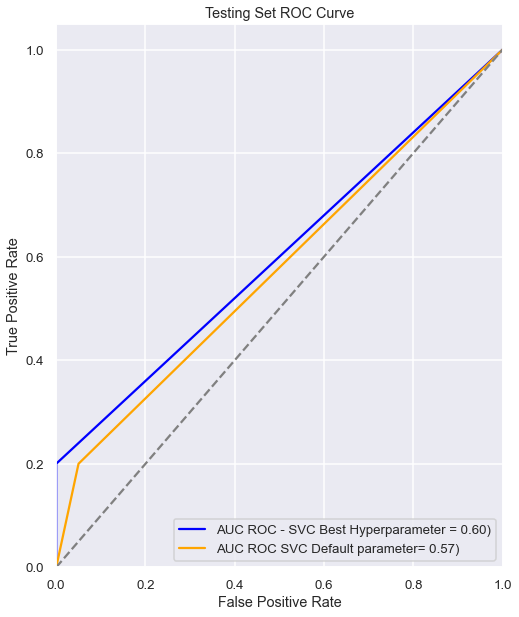

In [94]:
plt.figure(figsize=(8, 10))
plt.plot(svc_false_positive_rate_inf, svc_true_positive_rate_inf, color='blue', label=f'AUC ROC - SVC Best Hyperparameter = {(roc_auc_score(y_test_inf, svc_best.predict(X_test_inf))):.2f})')
plt.plot(svc_default_false_positive_rate_inf, svc_default_true_positive_rate_inf, color='orange', label=f'AUC ROC SVC Default parameter= {(roc_auc_score(y_test_inf, svc_pipe.predict(X_test_inf))):.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing Set ROC Curve')
plt.show()

In [95]:
Inference_Testing.sort_values(by='roc_auc_score', ascending=False)

,model,Inference_Testing_score,macro_f1_score,roc_auc_score
0,SVC hyper parameter,0.84,0.621212,0.600
1,SVC default,0.80,0.584718,0.575


**Berdasarkan hasil testing terhadap dataset inference didapatkan bahwa, model SVC dengan hyperparameter jauh lebih baik dapat memprediksi dengan benar pada dataset inference, ditunjunakan dengan nilai ROC_AUC score yang lebih tinggi dan juga nilai inference testing score, Hal tersebut menunjukan bahwa SVC model dengan hyperparameter merupakan model terbaik**

# **X.Kesimpulan**

Pada Tahapan ini kita akan mengambil kesimpulan terkait model yang sudah kita buat dan sudah diuji , serta apa saja insight yang terdapat pada dataset tersebut.

In [96]:
X_train_final.columns

Index(['limit_balance', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_5',
       'pay_amt_6'],
      dtype='object')

Kesimpulan yang dapat ditarik dari hasil EDA dan pemodelan dengan menggunakan 7 model klasifikasi yang berbeda ini adalah:

Dataset yang digunakan ini adalah dataset terkait kartu kredit (*credit card*) terkait default payment yang didalamnya berisikan informasi terkait riwayat pembayaran, jumlah limit kartu kredit dan laporan tagihan serta informasi terkait karakteristik pengguna kredit card tersebut. 

Informasi yang terdapat pada dataset ini yaitu **Pengguna kartu kredit didominasi oleh wanita** yaitu sebanyak 1801 jiwa atau **sebesar 60%**, berdasarkan status pernikahan 53,8% pengguna merupakan pengguna dengan status single/menikah dan 44,9% lainnya merupakan pengguna dengan status menikah, jika dilihat berdasarkan **kategori umur** pengguna kartu kredit didominasi oleh **kalangan dewasa dengan rentang umur 25 - 40 tahun**. Kita juga dapat mengetahui limit dari masing-masing pengguna kartu kredit, dimana **rata rata pengguna memiliki limit sebesar 163000 NT dollar**, dengan maximal limit kredit yang diberikan oleh perusahaan adalah sebesar 800000 NT dollar, dan berdasarkan laporan bulanan yang dikeluarkan bank penerbit yang  ditujukan ke pemegang kartu / billing statement, para pengguna **rata rata** memiliki **tagihan 45 - 55 ribu per bulannya**, didapatkan juga informasi bahwa sebanyak **78% dari total nasabah atau sebagian besar pengguna memiliki kemampuan untuk membayar tagihan dibulan berikutnya**, dan 22% sisanya 2329 diragukan untuk dapat membayar tagihan dibulan berikutnya. berdasarkan informasi tersebut maka perusahaan berusaha untuk mengetahui **Variabel/feature mana yang merupakan faktor terkuat dari yang mempengaruhi status pembayaran default/tagihan bulan berikutnya**, baik yang diragukan untuk melakukan pembayaran tagihan dibulan berikutnya ataupun yang memiliki kemampuan untuk membayar tagihan dibulan selanjutnya. sehingga perusahaan dapat lebih mudah dalam menentukan strategi / kebijakan terkait penggunaan kartu kredit tersebut, baik berupa promosi yang tepat kepada pengguna yang memiliki jaminan pembayaran yang baik dan berpotensi untuk menggunakan kartu kredit dengan nilai yang lebih besar, ataupun terhadap pengguna yang dirasa **memiliki risiko untuk gagal bayar** pada tagihan berikutnya. setelah dilakukan **EDA** dan dilihat korelasi antara tiap feature terhadap labelnya, **kolom-kolom yang akan digunakan sebagai features adalah** `'limit_balance', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5','pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_5', dan 'pay_amt_6'`. Setelah melalui tahapan EDA dan feature selection tahapan selanjutnya adalah membuat model, didapatkan 1 model klasifikasi dengan performa paling baik diantara 7 model lainnya yaitu model **Support Vector Machine**, setelah mendapatkan model tersebut lalu dilakukan hyper parameter pada model tersebut dan kita mendapatkan performansi pada kedua model tersebut yaitu :
- **Model 1 : Support Vector Machine default** dengan average **f1-score 0.666** dan **ROC AUC 0.642**
- **Model 2 : Support Vector Machine dengan Hyper Parameter** dengan average **f1-score 0.665** dan **ROC AUC 0.640**
Kedua model tersebut tidak memiliki perbedaan yang signifikan, lalu untuk memastikan bahwa model yang didapat benar benar dapat memprediksi dengan baik, maka kita lakukan uji testing pada data inference dan didapatkan bahwa **model Support Vector Machine dengan Hyper Parameter** merupakan **model dengan performance terbaik** dimana berdasarkan hasil uji tersebut didapatkan **model goodfit** dengan **nilai test score sebesar 0,84** **f1-score 0.621** dan **ROC AUC 0.600** yang menggambarkan bahwa model sudah cukup baik dalam mengklasifikasikan setiap target. adapun hyperparameter untuk model performance terbaik tersebut adalah `hyper parameter terbaik yaitu : 'classifier__C': 10, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'`. Berdasarkan hasil evaluasi dan skoring pada model tersebut, kita dapat menyimpulkan **bahwa model yang dibuat sudah cukup mampu untuk melakukan prediksi terhadap default payment pengguna kartu kredit, namun masih memerlukan beberapa peningkatan pada model tersebut**

**Model Metriks**
dikarenakan data yang imbalanced pada kolom target maka pada model ini perlu ditekankan kepada metriks precision atau akurasi pada target 1 [default payment next month = yes], dan setelah melalui beberapa tahapan, saya lebih memilih model dengan metriks yang balanced yaitu dengan melihat nilai ROC_AUC sebagai metriks yang perlu diperhatikan. 

**Kelemahan dan Kekurangan Model**
Kelemahan pada model ini adalah nilai ROC/f1 skor masih berada pada rentang 0,6 - 0,7 belum dapat mencapai excellent classification modelling, hal tersebut dapat dikarenakan terdapat imbalanced pada data target, untuk meningkatkan nilai tersebut, saya menyarankan untuk mensamakan jumlah target yaitu dapat menggunakan Smote. selain itu pengambilan data yang dilakukan juga tidak mengambil keseluruhan dataset pada kolom, sehingga dapat menimbulkan feature yang seharusnya memilki korelasi yang kuat terhadap target namun tidak terselect saat query. serta jika dilihat berdasarkan confussion matrix nilai recall pada kategori 1 masih sangat rendah. 

Kelebihan model ini adalah model sudah dapat memprediksi atau mengklasifikasikan target dengan cukup akurat dan balanced terhadap kedua jenis klasifikasi target, ditunjukan dengan nilai akurasi yang cukup tinggi dan nilai skor train set dan test set diatas >80% dan juga tidak terdapat perbedaan selisih nilai yang signifikan pada skore train dan test set tersebut sehingga model yang terbentuk dapat dikatakan goodfit.

**NOTE**: hanya model SVM yang memakai hyperparameter terbaik berdasarkan grid search.

## **XI.Pemahaman Konsep (Pertanyaan dan Jawaban)**

### **Pertanyaan**
1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

### **Jawaban**
1. Criterion : merupakan parameter yang digunakan untuk memisahkan atribut, dapat juga digunakan untuk mengukur kualitas split/pembagian, serta merupakan kriteria yang dapat mendukung ketidakmurniaan gini/gini impurity ataupun entropi. salah satu jenis dari criterion adalah gini impurity , Nilai Gini memberikan informasi mengenai bagaimana kualitas dari split dengan melihat seberapa acak respon kelas yang berada dalam kelompok splitting. dimana akan berakhir pada leaf node dalam decision tree yang memiliki nilai impurity atau tidak dapat dipecah kembali, Gini impurity berguna untuk menghitung ketidakmurnian (sudah murni) 

    (Sumber : Pembelajaran Decision Tree W2D2AM, Hacktiv 8 dan Referensi : https://sis.binus.ac.id/2022/02/17/mengenal-algoritma-decision-tree/)

2. Pruning merupakan bagian dari proses pembentukan decision tree, Pruning biasanya digunakan untuk mensederhanakan model agar tidak overfit, yaitu dengan memangkas pohon (tree pruning)yaitu mengidentifikasikan dan membuang cabang yang tidak diperlukan pada pohon yang telah terbentuk, sehingga proses dapat dijalankan lebih sederhana dan dapat mengurangi tingkat keselahan prediks 

    (Sumber : Pembelajaran Decision Tree W2D2AM, Hacktiv 8 dan Referensi : https://repository.ipb.ac.id/handle/123456789/14825
    
3. cara memilih nilai K yang optimal dapat menggunakan Uji Akurasi ataupun melalui Metode k-Fold Cross Validation dalam mengetahui nilai k-Optimal, yaitu dengan melihat Nilai MSE terkecil , nilai tersebut didapat melalui tahapan klasifikasi terhadap objek berdasarkan data training yang jaraknya paling dekat dengan objek tersebut. Pemilihan nilai k pada algoritma kNN menjadi hal yang penting karena akan     mempengaruhi kinerja dari algoritma kNN, oleh karena itu perlu diketahui berapa nilai k dan tingkat akurasinya. Dalam menentukan nilai k, bila jumlah klasifikasi kita genap maka sebaiknya kita gunakan nilai k ganjil, dan begitu pula sebaliknya bila jumlah klasifikasi kita ganjil maka sebaiknya gunakan nilai k genap. 
    
    (Sumber : Pembelajaran KNN dan Naive Bayes W1D4AM Referensi : http://klik.ulm.ac.id/index.php/klik/article/view/26/24)

4. Cross Validation adalah metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma , dimana nantinya akan terdapat dua set data berupa set train dan set test
pada setiap model, kemudian model tersebut akan dilatih/train dan kemudian ditest/validasi, dalam artian cross validation merupakan teknik validasi dari pengembangan model Split Validation dimana validasinya mengukur training error dengan menguji dengan test data atau data uji. dalam cross validation kita dapat menentukan nilai fold atau pembagian tahapan/percobaanya, sebagai contoh jika kita menggunakan cross validation dengan nilai 5, makan data set test dan train tersebut akan diuji melalui 5 percobaan. tata cara memilih cross validation terbaik dapat dilakukan dengan melalui skor akurasi paling tinggi atau scores mean (memilih nilai mean score tertinggi) dan memilih nilai standar deviasi (std) terendah, atau dapat juga menggunakan rentang score mean+-std. 

    (Sumber : Pembelajaran Model Improvement W2D3AM Referensi : https://cmemorys.medium.com/k-fold-cross-validation-secara-singkat-30f8e5188f46)

5. Sebelum kita menjelaskan terkait Accuracy, Precision, Recall, F1 Score, ke empat nilai tersebut dapat dilihat melalui Confusion Matrix ataupun classification report, Confusion Matrix merepresentasikan prediksi dan kondisi sebenarnya (aktual) dari data yang dihasilkan oleh algoritma Machine Learning. Berdasarkan Confusion Matrix, kita bisa menentukan Accuracy, Precission, Recall dan Specificity.

     a.Accuracy merupakan rasio prediksi Benar (positif dan negatif) dengan keseluruhan data ,atau dalam kata lain seberapa besar persentase prediksi nilai bener pada data aktual yang benar. baik benar (TP) dalam menebak prediksi yang nilainya salah (TN),ataupun yang nilainya benar. Akurasi = (TP + TN ) / (TP+FP+FN+TN)

     b.Precision Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positif , Precission = (TP) / (TP+FP)

     c.Recall Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif, Recall = (TP) / (TP + FN)

     d.F1 Score Secara definisi, F1-Score adalah harmonic mean dari precision dan recall. F1 Score juga dapat dihitung melalui perbandingan rata-rata presisi dan recall yang dibobotkan atau secara perhitungan matematisnya adalah F1 Score = 2 * (Recall*Precission) / (Recall + Precission).  Nilai terbaik F1-Score adalah 1.0 dan nilai terburuknya adalah 0. Secara representasi, jika F1-Score punya skor yang baik mengindikasikan bahwa model klasifikasi kita punya precision dan recall yang baik.

    (Sumber : Pembelajaran Model Evaluation W2D3AM Referensi : https://rey1024.medium.com/mengenal-accuracy-precission-recall-dan-specificity-serta-yang-diprioritaskan-b79ff4d77de8)

